# Problem Statement  
To predict the cost required to ship the sculptures to customers based on the information provided in the dataset.

# How will the company profit from this solution?
For the transport company having these kind of solution will help in many ways.
1. They can prioritize transports based on how reputated the artist is and how big the client is, because they don't want to mess with good paying clients.
1. They can do batch transports of the sculptures which are intended to go at same nearby location which will make the delivery cost less.
1. The company can't keep track which factor is making the cost vary more.
1. The cost is overall cost that company had to incur in order to ship the product. It's not something they can know before hand. There is no specific formula calculator the cost.
1. That's why they want a Data Scientist to look into past data and try to build some models which will predict the cost for future shipments.
1. So that accordingly they can ask the customers price that is profitable to them. 
1. If model is not in place then there maybe a chance of the company asking lower price for shipment while the actual cost of shipment for delivery was much higher. Thus they have a high chance of making lots of losses

## Dataset Desciption  

Dataset Link: https://www.kaggle.com/datasets/oossiiris/hackerearth-machine-learning-exhibit-art

The dataset folder contains the following files:  
train.csv: *6500 x 20*  
test.csv: *3500 x 19*  

### Columns Provided in the Dataset  
1. Customer Id
1. Artist Name
1. Artist Reputation
1. Height
1. Width
1. Material
1. Price of Sculpture
1. Base Shipping Price
1. International
1. Express Shipment
1. Installation Included
1. Transport
1. Fragile
1. Customer Information
1. Remote Location
1. Scheduled Date
1. Delivery Date
1. Customer Location
1. Cost

In [20]:
# Importing Necessary Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
pd.options.display.max_columns = None
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import time

In [21]:
# Read the dataset
train_data = pd.read_csv(r'/content/sample_data/train.csv')
test_data = pd.read_csv(r'/content/sample_data/test.csv')

# Basic EDA

## Identifying the number of features or columns

In [22]:

train_data.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

In [23]:
# Check which columns are having categorical, numerical or boolean values
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [24]:
# do same for test data as previously

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            3500 non-null   object 
 1   Artist Name            3500 non-null   object 
 2   Artist Reputation      3278 non-null   float64
 3   Height                 3381 non-null   float64
 4   Width                  3359 non-null   float64
 5   Weight                 3351 non-null   float64
 6   Material               3500 non-null   object 
 7   Price Of Sculpture     3500 non-null   float64
 8   Base Shipping Price    3500 non-null   float64
 9   International          3500 non-null   object 
 10  Express Shipment       3500 non-null   object 
 11  Installation Included  3500 non-null   object 
 12  Transport              3268 non-null   object 
 13  Fragile                3500 non-null   object 
 14  Customer Information   3500 non-null   object 
 15  Remo

1. After checking the Dtypes of all the columns 
    1. object - String values
    1. float64 - Numerical values
1. There are more String values than the numerical values in the dataset

# Knowing more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [25]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns  
train_data.describe()


,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [26]:
# For more information on the dataset like the total count in all the columns of test data
# min, max values and more information of the respective columns  

test_data.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price
count,3278.000000,3381.000000,3359.000000,3.351000e+03,3500.000000,3500.000000
mean,0.463279,21.275067,9.371837,3.749665e+05,1059.608646,36.352909
std,0.272287,11.689805,5.231695,2.517256e+06,7409.348267,26.299318
min,0.000000,3.000000,2.000000,4.000000e+00,3.000000,10.000000
25%,0.230000,12.000000,6.000000,4.895000e+02,5.160000,16.870000
50%,0.450000,20.000000,8.000000,2.929000e+03,7.120000,23.055000
75%,0.680000,29.000000,12.000000,3.340650e+04,81.195000,55.742500
max,1.000000,65.000000,48.000000,6.459500e+07,227254.240000,99.980000


## Get the total number of samples in the dataset using the len() function

In [27]:
# print len of train and test data set


print("train data length:",len(train_data))
print("test data length:",len(test_data))

train data length: 6500
test data length: 3500


## Get unique values

In [28]:
# looping through train data set columns and printing length of unique values 
for x in train_data.columns:
  print(x,len(train_data[x].unique()))



Customer Id 6500
Artist Name 6449
Artist Reputation 102
Height 66
Width 41
Weight 4411
Material 8
Price Of Sculpture 3424
Base Shipping Price 3732
International 2
Express Shipment 2
Installation Included 2
Transport 4
Fragile 2
Customer Information 2
Remote Location 3
Scheduled Date 1660
Delivery Date 1664
Customer Location 6500
Cost 6356


In [29]:
# looping through test data set columns and printing length of unique values 
for x in test_data.columns:
  print(x,len(test_data[x].unique()))



Customer Id 3500
Artist Name 3482
Artist Reputation 102
Height 61
Width 39
Weight 2701
Material 7
Price Of Sculpture 2054
Base Shipping Price 2434
International 2
Express Shipment 2
Installation Included 2
Transport 4
Fragile 2
Customer Information 2
Remote Location 2
Scheduled Date 1479
Delivery Date 1472
Customer Location 3500




## By the observation gather from the train_data.info(), we can know this columns are missing values in the train dataset

    1. Artist reputation
    2. Height
    3. Width
    4. Weight
    5. Transport
    6. Material
    7. Remote Location

## By the observation gather from the test_data.info(), we can know this columns are missing values in the test dataset

    1. Artist Reputation
    2. Height
    3. Width
    4. Weight
    5. Transport



## Counting the total number of missing values¶


In [30]:
# Check for missing values in all the columnns of the dataset

train_data.isnull().sum()


Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [31]:
# Check for missing values in all the columnns of the dataset


test_data.isnull().sum()

Customer Id                0
Artist Name                0
Artist Reputation        222
Height                   119
Width                    141
Weight                   149
Material                   0
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                232
Fragile                    0
Customer Information       0
Remote Location            0
Scheduled Date             0
Delivery Date              0
Customer Location          0
dtype: int64

In [32]:
categorical_list = []
var_list = []
# looping on whole dataset for geting list of categorical data column name
for x in train_data.columns:
  if train_data[x].dtype == 'object':
    categorical_list.append(x)
  if train_data[x].dtype == 'int64':
    var_list.append(x)
  if train_data[x].dtype == 'float64':
    var_list.append(x)
  


print('Categorical data',categorical_list)
print('Numerical data', var_list)

Categorical data ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']
Numerical data ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']



## Check for categorical columns in the dataset

#### By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

    1. Customer Id
    2. Artist Name
    3. Material
    4. International
    5. Express Shipment
    6. Installation included
    7. Transport
    8. Fragile
    9. Customer Information
    10. Remote Information
    11. Scheduled Date
    12. Delivery Date
    13. Customer Location



# Correlation Matrix


## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [33]:
# Using pandas
corr = train_data.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)



,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Artist Reputation,1.00,-0.00,-0.01,0.02,0.05,-0.01,0.07
Height,-0.00,1.00,0.77,0.23,0.20,0.35,0.11
Width,-0.01,0.77,1.00,0.33,0.29,0.33,0.16
Weight,0.02,0.23,0.33,1.00,0.89,0.15,0.42
Price Of Sculpture,0.05,0.20,0.29,0.89,1.00,0.13,0.48
Base Shipping Price,-0.01,0.35,0.33,0.15,0.13,1.00,0.05
Cost,0.07,0.11,0.16,0.42,0.48,0.05,1.00


## From above correlation matrix:
1. Artist Reputation and all other numerical variables have almost no correlation.

2. Height and Width are strongly correlated.

3. Weight and Price of Sculpture are strongly correlated.

4. Cost has weak correlation with Weight and Prie of Sculpture.

[Text(0.5, 0, 'Artist Reputation'),
 Text(1.5, 0, 'Height'),
 Text(2.5, 0, 'Width'),
 Text(3.5, 0, 'Weight'),
 Text(4.5, 0, 'Price Of Sculpture'),
 Text(5.5, 0, 'Base Shipping Price'),
 Text(6.5, 0, 'Cost')]

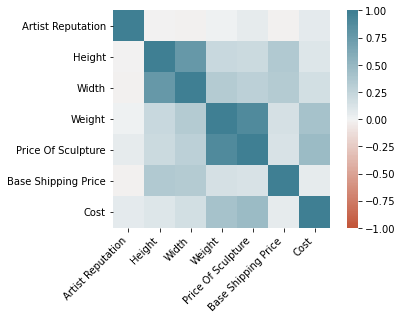

In [34]:
# Using seaborn
ax = sns.heatmap(corr,vmin = -1,vmax = 1,center = 0,cmap = sns.diverging_palette(20,220,n = 200),square = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment = 'right')



# Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [35]:
# Import necessary libraries for performing Chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Helper function for performing chi-square test
def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1],train_data[var_2])
    
    
    #Observed Values
    observed_values = contingency_table.values
    
    
    #Expected Values
    b = chi2_contingency(contingency_table)
    
    expected_values = b[3]
    
    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f = (no_of_rows - 1)*(no_of_columns - 1)
    print("Degree of Freedom: ",degree_f)
    
    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)
    
    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value = chi2.ppf(q = 1-alpha,df = degree_f)
    print('critical_value:',critical_value)
    
    #p-value
    p_value = 1-chi2.cdf(x= chi_square_statistic,df = degree_f)

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [36]:
# looping on whole dataset for performing chi-square test

for x in tqdm(categorical_list):
  for i in categorical_list:
    if i!= x:
      print('chi square test on',x,' ',i,'\n')
      perform_chi_square_test(x,i)
      print('-----------------------------------------------------------------------------------\n')



  0%|          | 0/13 [00:00<?, ?it/s]

chi square test on Customer Id   Artist Name 

Degree of Freedom:  41905552
Significance level:  0.05
chi-square statistic:  12997.999999999767
critical_value: 41920611.509491675
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Customer Id   Material 

Degree of Freedom:  34410
Significance level:  0.05
chi-square statistic:  9780.000000000084
critical_value: 34842.6378000954
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Customer Id   International 

Degree of Freedom:  6499
Significance level:  0.05
chi-square statistic:  6499.9999999995
critical_value: 6687.657867435159
p-value: 0.494

  8%|▊         | 1/13 [00:17<03:33, 17.76s/it]

chi-square statistic:  12997.99999999973
critical_value: 42252119.94376706
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Artist Name   Customer Id 

Degree of Freedom:  41905552
Significance level:  0.05
chi-square statistic:  12997.999999999802
critical_value: 41920611.509491675
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Artist Name   Material 

Degree of Freedom:  34146
Significance level:  0.05
chi-square statistic:  9705.98935889295
critical_value: 34576.97931228599
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationsh

 15%|█▌        | 2/13 [00:35<03:14, 17.70s/it]

chi-square statistic:  12997.999999999844
critical_value: 41920611.509491675
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Material   Customer Id 

Degree of Freedom:  34410
Significance level:  0.05
chi-square statistic:  11.817577445179253
critical_value: 34842.6378000954
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Material   Artist Name 

Degree of Freedom:  34146
Significance level:  0.05
chi-square statistic:  11.576331360946746
critical_value: 34576.97931228599
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship b

 23%|██▎       | 3/13 [00:39<01:54, 11.42s/it]

Degree of Freedom:  34410
Significance level:  0.05
chi-square statistic:  12.218217493944875
critical_value: 34842.6378000954
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on International   Customer Id 

Degree of Freedom:  6499
Significance level:  0.05
chi-square statistic:  2.4602496219608545
critical_value: 6687.657867435159
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on International   Artist Name 

Degree of Freedom:  6448
Significance level:  0.05
chi-square statistic:  1.0274802049371217
critical_value: 6635.920591949084
p-value: 1.0
Retain H0,There is no relationship between 2

 31%|███       | 4/13 [00:43<01:17,  8.63s/it]

Degree of Freedom:  6499
Significance level:  0.05
chi-square statistic:  2.4602496219608545
critical_value: 6687.657867435159
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Express Shipment   Customer Id 

Degree of Freedom:  6499
Significance level:  0.05
chi-square statistic:  0.9782359679266897
critical_value: 6687.657867435159
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Express Shipment   Artist Name 

Degree of Freedom:  6448
Significance level:  0.05
chi-square statistic:  2.5336144710827826
critical_value: 6635.920591949084
p-value: 1.0
Retain H0,There is no relationship bet

 38%|███▊      | 5/13 [00:48<00:57,  7.15s/it]

Degree of Freedom:  6499
Significance level:  0.05
chi-square statistic:  2.5336144710827826
critical_value: 6687.657867435159
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Installation Included   Customer Id 

Degree of Freedom:  6499
Significance level:  0.05
chi-square statistic:  2.175336873096639
critical_value: 6687.657867435159
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Installation Included   Artist Name 

Degree of Freedom:  6448
Significance level:  0.05
chi-square statistic:  1.3197139938712972
critical_value: 6635.920591949084
p-value: 1.0
Retain H0,There is no relatio

 46%|████▌     | 6/13 [00:52<00:43,  6.20s/it]

Degree of Freedom:  6499
Significance level:  0.05
chi-square statistic:  3.030959752321981
critical_value: 6687.657867435159
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Transport   Customer Id 

Degree of Freedom:  10214
Significance level:  0.05
chi-square statistic:  2.949612403100775
critical_value: 10450.224787309298
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Transport   Artist Name 

Degree of Freedom:  10158
Significance level:  0.05
chi-square statistic:  3.2860334992939206
critical_value: 10393.579416858618
p-value: 1.0
Retain H0,There is no relationship between 2 categ

 54%|█████▍    | 7/13 [00:56<00:32,  5.40s/it]

Degree of Freedom:  10214
Significance level:  0.05
chi-square statistic:  4.974226482747608
critical_value: 10450.224787309298
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Fragile   Customer Id 

Degree of Freedom:  6499
Significance level:  0.05
chi-square statistic:  0.38051638893975465
critical_value: 6687.657867435159
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Fragile   Artist Name 

Degree of Freedom:  6448
Significance level:  0.05
chi-square statistic:  0.38051638893975465
critical_value: 6635.920591949084
p-value: 1.0
Retain H0,There is no relationship between 2 categori

 62%|██████▏   | 8/13 [01:00<00:25,  5.11s/it]

Degree of Freedom:  6499
Significance level:  0.05
chi-square statistic:  0.38051638893975465
critical_value: 6687.657867435159
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Customer Information   Customer Id 

Degree of Freedom:  6499
Significance level:  0.05
chi-square statistic:  0.7066416822819073
critical_value: 6687.657867435159
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Customer Information   Artist Name 

Degree of Freedom:  6448
Significance level:  0.05
chi-square statistic:  0.7066416822819073
critical_value: 6635.920591949084
p-value: 1.0
Retain H0,There is no relatio

 69%|██████▉   | 9/13 [01:05<00:19,  4.85s/it]

Degree of Freedom:  6499
Significance level:  0.05
chi-square statistic:  0.7066416822819073
critical_value: 6687.657867435159
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Remote Location   Customer Id 

Degree of Freedom:  5728
Significance level:  0.05
chi-square statistic:  0.49412276882890727
critical_value: 5905.18280825411
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Remote Location   Artist Name 

Degree of Freedom:  5684
Significance level:  0.05
chi-square statistic:  4.294638476925466
critical_value: 5860.505294489989
p-value: 1.0
Retain H0,There is no relationship betwee

 77%|███████▋  | 10/13 [01:09<00:14,  4.70s/it]

Degree of Freedom:  5728
Significance level:  0.05
chi-square statistic:  0.49412276882890727
critical_value: 5905.18280825411
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Scheduled Date   Customer Id 

Degree of Freedom:  10781841
Significance level:  0.05
chi-square statistic:  2598.0000000000364
critical_value: 10789480.296237782
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Scheduled Date   Artist Name 

Degree of Freedom:  10697232
Significance level:  0.05
chi-square statistic:  3789.6666666666415
critical_value: 10704841.267512009
p-value: 1.0
Retain H0,There is no relationsh

 85%|████████▍ | 11/13 [01:18<00:11,  5.97s/it]

chi-square statistic:  2598.00000000005
critical_value: 10789480.296237782
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Delivery Date   Customer Id 

Degree of Freedom:  10807837
Significance level:  0.05
chi-square statistic:  2381.3333333333658
critical_value: 10815485.498842983
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Delivery Date   Artist Name 

Degree of Freedom:  10723024
Significance level:  0.05
chi-square statistic:  7797.999999999936
critical_value: 10730642.43393801
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no

 92%|█████████▏| 12/13 [01:27<00:06,  6.87s/it]

chi-square statistic:  2706.3333333333794
critical_value: 10815485.498842983
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Customer Location   Customer Id 

Degree of Freedom:  42237001
Significance level:  0.05
chi-square statistic:  12997.999999999918
critical_value: 42252119.94376706
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------

chi square test on Customer Location   Artist Name 

Degree of Freedom:  41905552
Significance level:  0.05
chi-square statistic:  12997.99999999969
critical_value: 41920611.509491675
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,T

100%|██████████| 13/13 [01:44<00:00,  8.06s/it]

chi-square statistic:  12996.999999999778
critical_value: 10815485.498842983
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-----------------------------------------------------------------------------------



From above chi-square test:

- correlated variables:

  1. Customer Information and Transport 
  2. Customer Information and Express Shipment
  3. Fragile and Material 
  4. Transport and Express Shipment
  5. Transport and International 


# Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [37]:
# import statsmodle library for vif 

import statsmodels.api as sm


In [38]:
# creating a dataframe of just numerical values
# 'Customer Id',
#  'Artist Name',
#  'Material',
#  'International',
#  'Express Shipment',
#  'Installation Included',
#  'Transport',
#  'Fragile',
#  'Customer Information',
#  'Remote Location',
#  'Scheduled Date',
#  'Delivery Date',
#  'Customer Location',
#  'Cost'
train_for_vif = train_data.drop(['Customer Id',
  'Artist Name',
  'Material',
  'International',
  'Express Shipment',
  'Installation Included',
  'Transport',
  'Fragile',
  'Customer Information',
  'Remote Location',
  'Scheduled Date',
  'Delivery Date',
  'Customer Location',
  'Cost'],axis = 1)


# target values
target = train_data['Cost']


# numerical values column names
# 'Artist Reputation',
#  'Height',
#  'Width',
#  'Weight',
#  'Price Of Sculpture',
#  'Base Shipping Price'
names = [ 'Artist Reputation',
  'Height',
  'Width',
  'Weight',
  'Price Of Sculpture',
  'Base Shipping Price']

# print names

names


['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price']

In [39]:
# droping rows with empty cells
train_for_vif = train_for_vif.dropna()



In [40]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  y = train_for_vif.loc[:,train_for_vif.columns == names[i]]
  x = train_for_vif.loc[:,train_for_vif.columns != names[i]]
  model = sm.OLS(y,x)
  results = model.fit()
  rsq = results.rsquared
  vif = round(1/(1-rsq),2)
  print("R Square value of {} columns is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))


R Square value of Artist Reputation columns is 0.61 keeping all other columns as features
Variance inflation Factor of Artist Reputation columns is 2.55 

R Square value of Height columns is 0.9 keeping all other columns as features
Variance inflation Factor of Height columns is 10.47 

R Square value of Width columns is 0.9 keeping all other columns as features
Variance inflation Factor of Width columns is 10.36 

R Square value of Weight columns is 0.84 keeping all other columns as features
Variance inflation Factor of Weight columns is 6.09 

R Square value of Price Of Sculpture columns is 0.83 keeping all other columns as features
Variance inflation Factor of Price Of Sculpture columns is 6.01 

R Square value of Base Shipping Price columns is 0.68 keeping all other columns as features
Variance inflation Factor of Base Shipping Price columns is 3.12 



Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is above 2.5

1. There is high colinearity between height and all other variables.
2. There is high colinearity between Width and all other variables.
3. There is high colinearity between Price Of Sculpture and all other variables.

# ANOVA TEST

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

## Homogeneity of variance Assumption Check

### Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

Columns to perform anova test with:
1. Artist Name with all numerical columns
2. Material with all numerical columns
3. International with all numerical columns
4. Express Shipment with all numerical columns
5. Installation Included with all numerical columns
6. Transport with all numerical columns
7. Fragile with all numerical columns
8. Customer Information with all numerical columns
9. Remote Location with all numerical columns
10. Scheduled Date with all numerical columns
11. Delivery Date with all numerical columns
12. Customer Location with all numerical columns

In [41]:
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = train_data[[x,y]]
  groups = train_anova.groupby(x).count().reset_index()
  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio = train_anova.groupby(x).std().max()/train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
  anova_table = pd.DataFrame(data,columns = ['Source of Variation','SS','df','MS','F','P-value','F crit'])
  anova_table.set_index('Source of Variation', inplace = True)

  # calculate SSTR and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
  SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
  SSTR = SSTR[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # update degree of freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique()-1
  anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0] - 1

  # calculate MS
  anova_table['MS'] = anova_table['SS']/anova_table['df']

  # calculate F 
  F = anova_table['MS']['Between Groups']/anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p-value
  anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F,anova_table['df']['Between Groups'],anova_table['df']['Within Groups'])

  # F critical 
  alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = 'two-tailed'
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = 1 - stats.f.cdf(1-alpha,anova_table['df']['Between Groups'],anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
  print(conclusion)
      
  # The critical value approach
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)

### Anova test between Artist Name and all numerical columns

In [42]:
# perform_anova_test Artist Name and Artist Reputation
perform_anova_test('Artist Name','Artist Reputation')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Artist Name and Height
perform_anova_test('Artist Name','Height')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Artist Name and Width

perform_anova_test('Artist Name','Width')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Artist Name and Weight
perform_anova_test('Artist Name','Weight')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Artist Name and Price Of Sculptureprint
perform_anova_test('Artist Name','Price Of Sculpture')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Artist Name and Base Shipping Price

perform_anova_test('Artist Name','Base Shipping Price')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Artist Name and Cost
perform_anova_test('Artist Name','Cost')



            Artist Name  Artist Reputation
0         Aaron Radford                  1
1         Aaron Schmitt                  1
2         Abby Gonzales                  1
3         Abby Phillips                  1
4              Abe Cook                  0
...                 ...                ...
6444   Zachary Paquette                  1
6445      Zachary Woods                  0
6446  Zachary Zimmerman                  1
6447      Zita Matchett                  0
6448    Zoila Ingwersen                  1

[6449 rows x 2 columns]
Artist Reputation    92.0
dtype: float64
                             SS    df        MS         F   P-value   F crit
Source of Variation                                                         
Between Groups        403.61977  6448  0.062596  1.283459  0.127308  0.57653
Within Groups          2.487342    51  0.048771                             
Total                406.107111  6499  0.062488                             
Approach 1: The p-value approach 

### Anova test between Material and all numerical columns

In [43]:
# perform_anova_test Material and Artist Reputation

perform_anova_test('Material','Artist Reputation')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Material and Height

perform_anova_test('Material','Height')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Material and Width

perform_anova_test('Material','Width')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Material and Weight


perform_anova_test('Material','Weight')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Material and Price Of Sculpture

perform_anova_test('Material','Price Of Sculpture')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Material and Base Shipping Price
perform_anova_test('Material','Base Shipping Price')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Material and Cost

perform_anova_test('Material','Cost')



    Material  Artist Reputation
0  Aluminium                761
1      Brass                764
2     Bronze                713
3       Clay                728
4     Marble                742
5      Stone                690
6       Wood                728
Artist Reputation    1.03544
dtype: float64
                             SS    df        MS         F  P-value    F crit
Source of Variation                                                         
Between Groups         0.310363     6  0.051727  0.928526  0.47298  0.440297
Within Groups        361.718481  6493  0.055709                             
Total                362.028844  6499  0.055705                             
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.9285255947268529  and p value is: 0.4729795187779877
Failed to reject the null hypothesis.
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.9285255947268529  and critical value 

### Anova test between International and all numerical columns

In [44]:
# perform_anova_test International and Artist Reputation

perform_anova_test('International','Artist Reputation')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test International and Height

perform_anova_test('International','Height')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test International and Width
perform_anova_test('International','Width')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test International and Weight

perform_anova_test('International','Weight')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test International and Price Of Sculpture
perform_anova_test('International','Price Of Sculpture')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test International and Base Shipping Price

perform_anova_test('International','Base Shipping Price')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test International and Cost

perform_anova_test('International','Cost')




  International  Artist Reputation
0            No               3810
1           Yes               1940
Artist Reputation    1.017074
dtype: float64
                             SS    df        MS         F   P-value    F crit
Source of Variation                                                          
Between Groups         0.087901     1  0.087901  1.406786  0.235634  0.323473
Within Groups         406.01921  6498  0.062484                              
Total                406.107111  6499  0.062488                              
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.4067858891827365  and p value is: 0.2356340540107178
Failed to reject the null hypothesis.
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.4067858891827365  and critical value is: 0.32347311605214013
Null Hypothesis is rejected.

---------------------------------------------------------------------------------

  Intern

### Anova test between Fragile and all numerical columns

In [45]:
# perform_anova_test Fragile and Height

perform_anova_test('Fragile','Height')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Fragile and Width
perform_anova_test('Fragile','Width')




print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Fragile and Weight


perform_anova_test('Fragile','Weight')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Fragile and Price Of Sculpture

perform_anova_test('Fragile','Price Of Sculpture')




print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Fragile and Base Shipping Price

perform_anova_test('Fragile','Base Shipping Price')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Fragile and Cost

perform_anova_test('Fragile','Cost')




  Fragile  Height
0      No    5144
1     Yes     981
Height    1.213999
dtype: float64
                                SS    df           MS         F P-value  \
Source of Variation                                                       
Between Groups         6682.256186     1  6682.256186  49.88059     0.0   
Within Groups        870504.948059  6498   133.965058                     
Total                877187.204245  6499   134.972643                     

                       F crit  
Source of Variation            
Between Groups       0.323473  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 49.88059033332636  and p value is: 1.8040013927134169e-12
Null Hypothesis is rejected.
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 49.88059033332636  and critical value is: 0.32347311605214013
Null Hypothesis is rejected.

--------------

### Anova test between Customer Information and all numerical columns

In [46]:
# perform_anova_test Customer Information and Artist Reputation

perform_anova_test('Customer Information','Artist Reputation')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Information and Height

perform_anova_test('Customer Information','Height')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Information and Width
perform_anova_test('Customer Information','Width')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Information and Weight
perform_anova_test('Customer Information','Weight')




print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Information and Price Of Sculpture

perform_anova_test('Customer Information','Price Of Sculpture')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Information and Base Shipping Price

perform_anova_test('Customer Information','Base Shipping Price')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Information and Cost
perform_anova_test('Customer Information','Cost')





  Customer Information  Artist Reputation
0              Wealthy               1513
1        Working Class               4237
Artist Reputation    1.017857
dtype: float64
                             SS    df        MS         F  P-value    F crit
Source of Variation                                                         
Between Groups         0.039193     1  0.039193  0.627181  0.42842  0.323473
Within Groups        406.067918  6498  0.062491                             
Total                406.107111  6499  0.062488                             
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.6271808540131343  and p value is: 0.4284201933217928
Failed to reject the null hypothesis.
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.6271808540131343  and critical value is: 0.32347311605214013
Null Hypothesis is rejected.

---------------------------------------------------------------------------

### Anova test between Remote Locaation and all numerical columns

In [47]:
# perform_anova_test Remote Location and Artist Reputation

perform_anova_test('Remote Location','Artist Reputation')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Remote Location and Height

perform_anova_test('Remote Location','Height')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Remote Location and Width

perform_anova_test('Remote Location','Width')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Remote Location and Weight
perform_anova_test('Remote Location','Weight')




print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Remote Location and Price Of Sculpture


perform_anova_test('Remote Location','Price Of Sculpture')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Remote Location and Base Shipping Price

perform_anova_test('Remote Location','Base Shipping Price')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Remote Location and Cost

perform_anova_test('Remote Location','Cost')


  Remote Location  Artist Reputation
0              No               4093
1             Yes               1020
Artist Reputation    1.005561
dtype: float64
                             SS    df        MS         F  P-value    F crit
Source of Variation                                                         
Between Groups         0.034795     1  0.034795  0.627859  0.42817  0.323473
Within Groups        360.107766  6498  0.055418                             
Total                360.142561  6499  0.055415                             
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.6278594691678515  and p value is: 0.42817048993547413
Failed to reject the null hypothesis.
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.6278594691678515  and critical value is: 0.32347311605214013
Null Hypothesis is rejected.

---------------------------------------------------------------------------------

  Remo

### Anova test between Scheduled Date and all numerical columns

In [48]:
# perform_anova_test Scheduled Date and Artist Reputation

perform_anova_test('Scheduled Date','Artist Reputation')




print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Scheduled Date and Height

perform_anova_test('Scheduled Date','Height')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Scheduled Date and Width

perform_anova_test('Scheduled Date','Width')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Scheduled Date and Weight

perform_anova_test('Scheduled Date','Weight')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Scheduled Date and Price Of Sculpture

perform_anova_test('Scheduled Date','Price Of Sculpture')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Scheduled Date and Base Shipping Price
perform_anova_test('Scheduled Date','Base Shipping Price')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Scheduled Date and Cost
perform_anova_test('Scheduled Date','Cost')




     Scheduled Date  Artist Reputation
0          01/01/15                  1
1          01/01/16                  1
2          01/01/17                  2
3          01/01/18                  3
4          01/01/19                  3
...             ...                ...
1655       12/30/18                  5
1656       12/31/15                  0
1657       12/31/16                  3
1658       12/31/17                  3
1659       12/31/18                  4

[1660 rows x 2 columns]
Artist Reputation    inf
dtype: float64
                             SS    df        MS         F   P-value    F crit
Source of Variation                                                          
Between Groups       115.542496  1659  0.069646  1.160107  0.000092  0.732813
Within Groups        290.564616  4840  0.060034                              
Total                406.107111  6499  0.062488                              
Approach 1: The p-value approach to hypothesis testing in the decision rule
F

### Anova test between Delivery Date and all numerical columns

In [49]:
# perform_anova_test Delivery Date and Artist Reputation

perform_anova_test('Delivery Date','Artist Reputation')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Delivery Date and Height
perform_anova_test('Delivery Date','Height')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Delivery Date and Width
perform_anova_test('Delivery Date','Width')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Delivery Date and Weight

perform_anova_test('Delivery Date','Weight')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Delivery Date and Price Of Sculpture

perform_anova_test('Delivery Date','Price Of Sculpture')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Delivery Date and Base Shipping Price
perform_anova_test('Delivery Date','Base Shipping Price')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Delivery Date and Cost

perform_anova_test('Delivery Date','Cost')



     Delivery Date  Artist Reputation
0         01/01/15                  0
1         01/01/16                  2
2         01/01/17                  1
3         01/01/18                  6
4         01/01/19                  1
...            ...                ...
1659      12/30/18                  4
1660      12/31/15                  3
1661      12/31/16                  3
1662      12/31/17                  4
1663      12/31/18                  2

[1664 rows x 2 columns]
Artist Reputation    inf
dtype: float64
                             SS    df        MS         F   P-value    F crit
Source of Variation                                                          
Between Groups        109.98591  1663  0.066137  1.080094  0.026507  0.732984
Within Groups        296.121201  4836  0.061233                              
Total                406.107111  6499  0.062488                              
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1

### Anova test between Customer Location and all numerical columns

In [50]:
# perform_anova_test Customer Location and Artist Reputation

perform_anova_test('Customer Location','Artist Reputation')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Location and Height

perform_anova_test('Customer Location','Height')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Location and Width

perform_anova_test('Customer Location','Width')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Location and Weight

perform_anova_test('Customer Location','Weight')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Location and Price Of Sculpture

perform_anova_test('Customer Location','Price Of Sculpture')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Location and Base Shipping Price

perform_anova_test('Customer Location','Base Shipping Price')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Location and Cost
perform_anova_test('Customer Location','Cost')




             Customer Location  Artist Reputation
0                 APO AA 01054                  1
1                 APO AA 06113                  1
2                 APO AA 07266                  1
3                 APO AA 07296                  1
4                 APO AA 08095                  1
...                        ...                ...
6495      Zacharyton, OH 03996                  1
6496   Zamorachester, CA 54819                  1
6497      Zavalatown, SD 31777                  1
6498   Zimmermanport, CT 07279                  1
6499  Zimmermanville, WV 96908                  1

[6500 rows x 2 columns]
Artist Reputation   NaN
dtype: float64
                             SS    df        MS    F P-value F crit
Source of Variation                                                
Between Groups       406.107111  6499  0.062488  NaN     NaN    NaN
Within Groups               0.0     0       NaN                    
Total                406.107111  6499  0.062488                 

# Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


  0%|          | 0/7 [00:00<?, ?it/s]

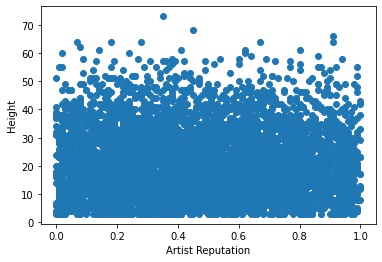

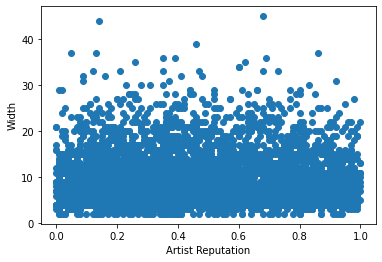

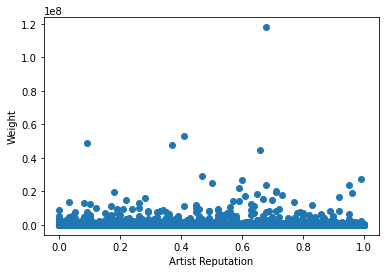

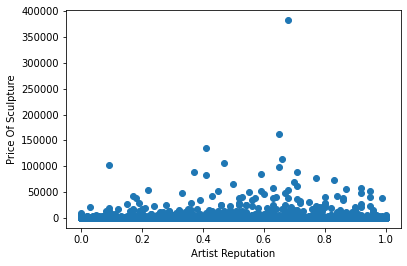

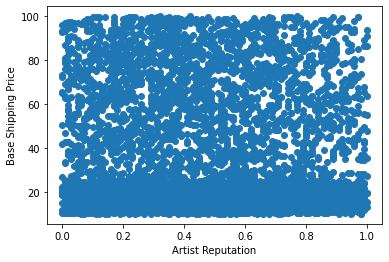

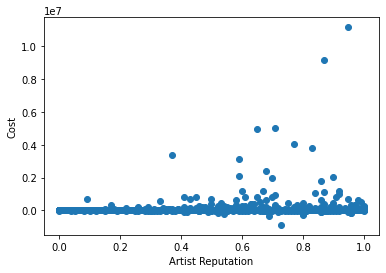

 14%|█▍        | 1/7 [00:00<00:05,  1.06it/s]

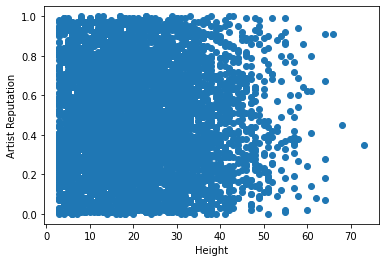

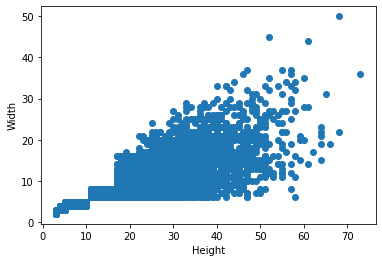

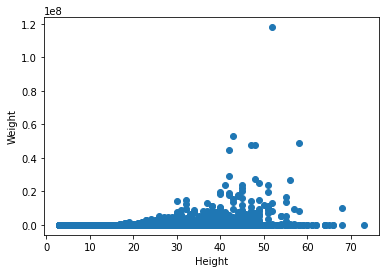

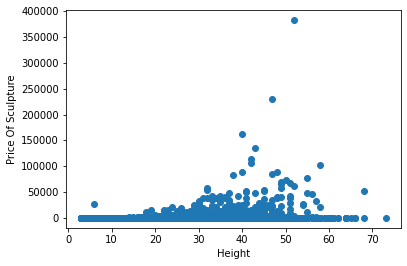

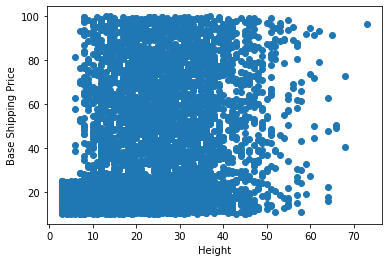

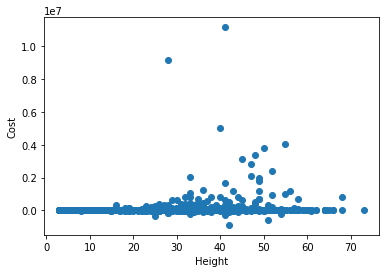

 29%|██▊       | 2/7 [00:01<00:04,  1.04it/s]

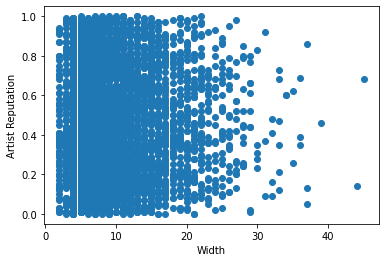

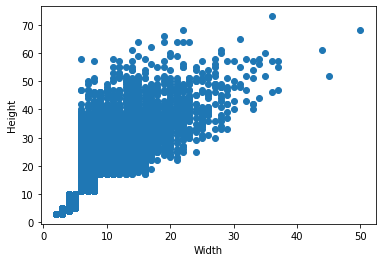

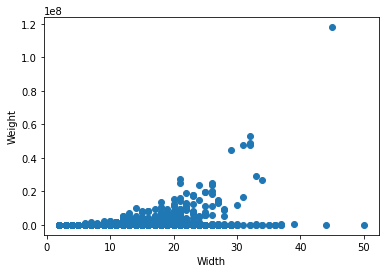

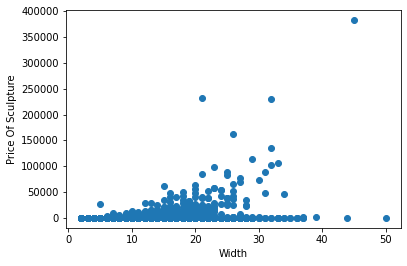

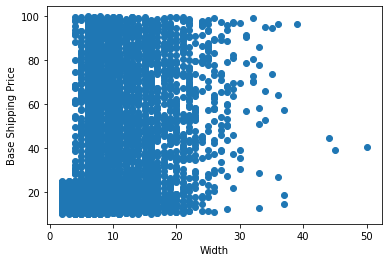

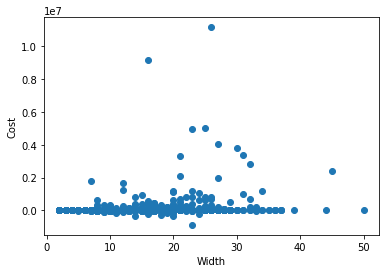

 43%|████▎     | 3/7 [00:02<00:04,  1.00s/it]

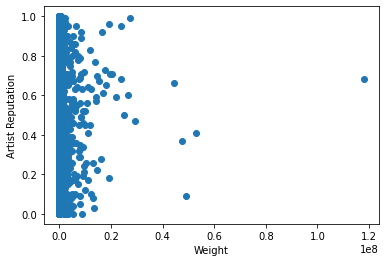

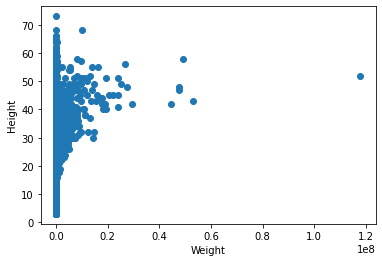

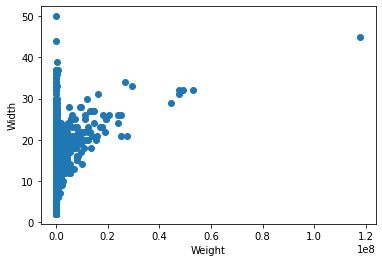

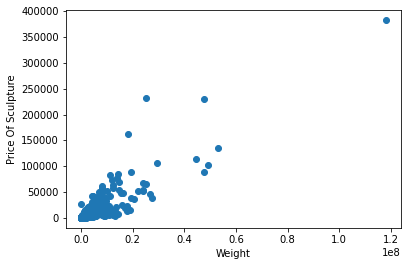

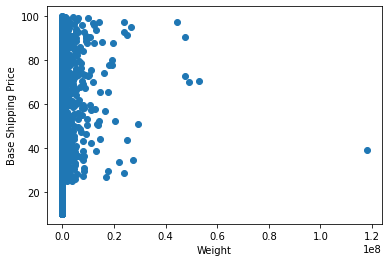

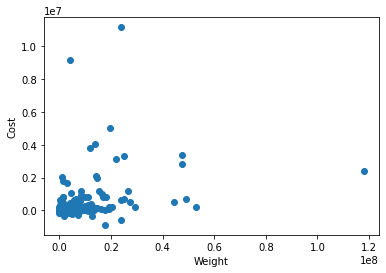

 57%|█████▋    | 4/7 [00:03<00:02,  1.02it/s]

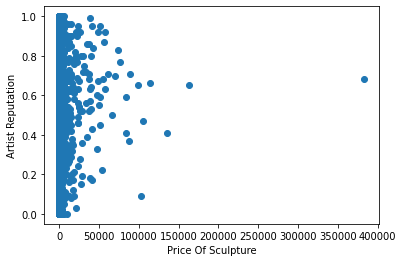

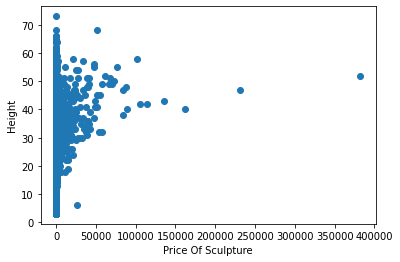

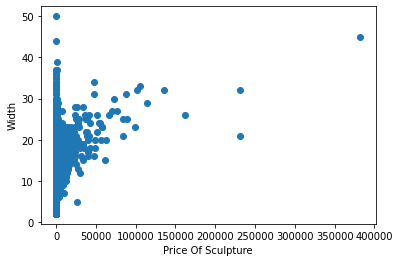

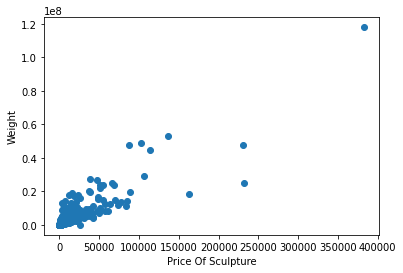

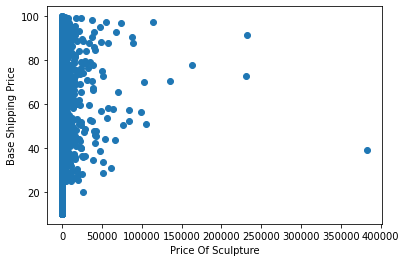

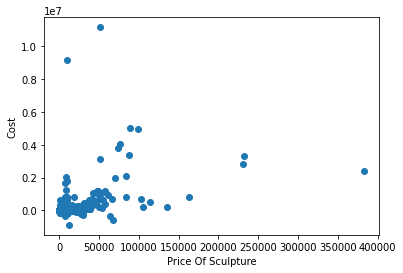

 71%|███████▏  | 5/7 [00:04<00:01,  1.01it/s]

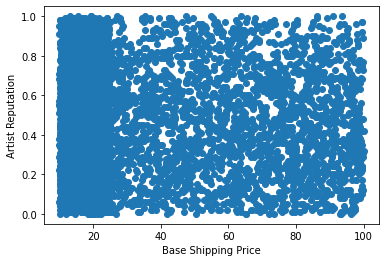

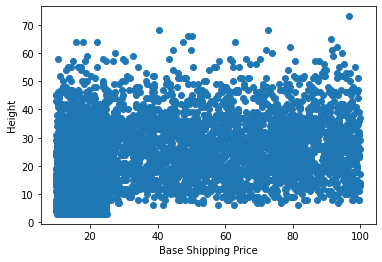

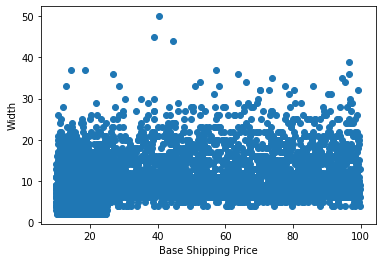

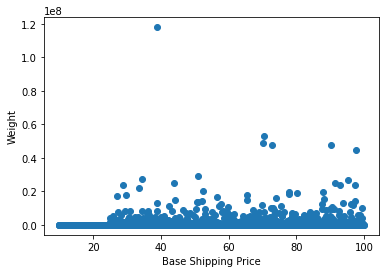

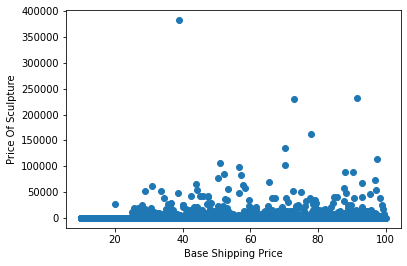

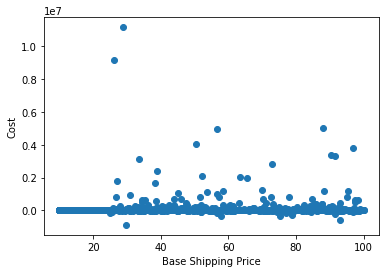

 86%|████████▌ | 6/7 [00:06<00:01,  1.02s/it]

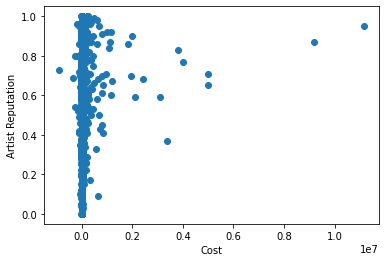

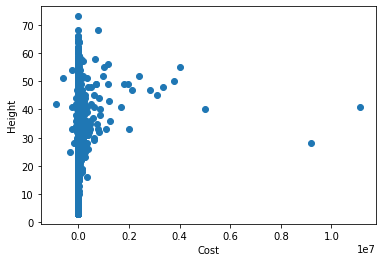

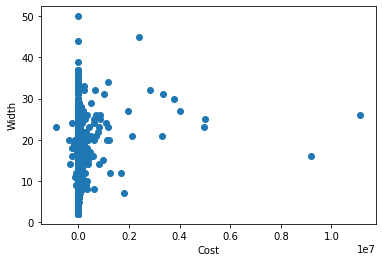

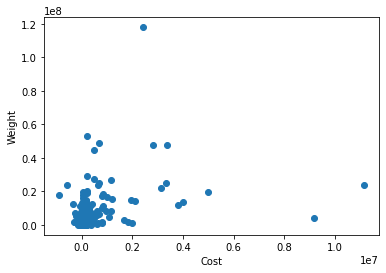

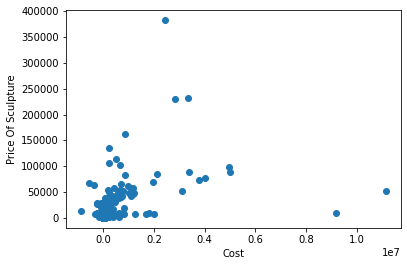

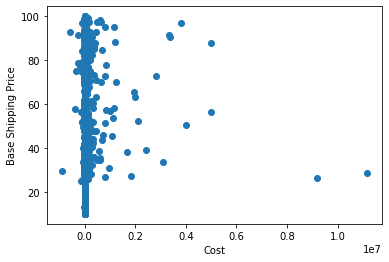

100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


In [51]:
from numpy.core.fromnumeric import var
# Using matplotlib 
# create function for ploting scatterplot between two columns of dataset

def plot_scatter(x, y):
  plt.figure()
  plt.xlabel(x)
  plt.ylabel(y)
  plt.scatter(train_data[x],train_data[y])
  plt.show()





# Loop through the different columns 
for i in tqdm(var_list):
  for j in var_list:
    if i != j:
      plot_scatter(i,j)







From above scatter plot

1. Increase in value on Width axis results in increase of values on Height axis. That is they are positively correlated.

2. Increase in value on Weight axis results in increase of values on Price Of Sculpture and Cost axis. Weight and Price Of Sculpture are strongly correlated , Weight and Cost are weakly correlated.

# Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7adcf37510>,
      dtype=object)

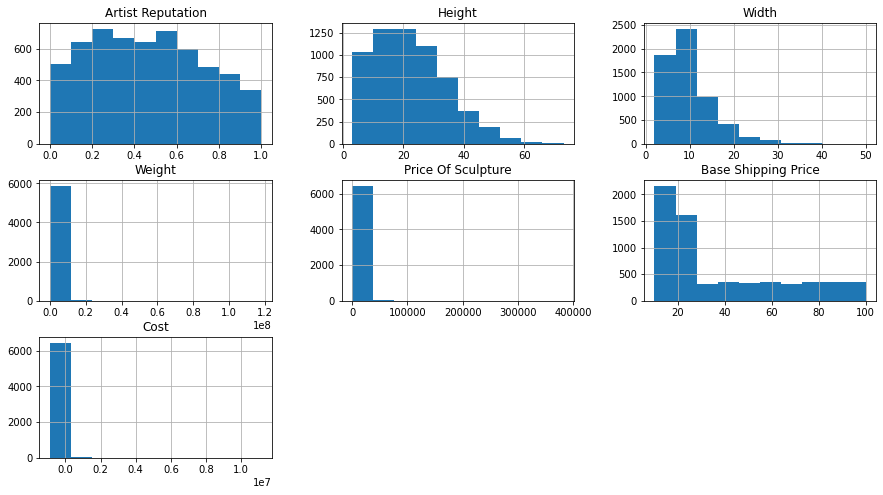

In [33]:
# Histogram using pandas 
train_data.hist(figsize = (15,8))




From the above histogram

1. Artist Reputation data distribution is symmetric.

2. Height data distribution is skewed right.

3. Width data distribution is skewed right.

4. Weight data distribution is skewed right.

5. Price Of Sculpture data distribution is skewed right.

6. Base Shipping Price data distribution is skewed right.

3. Cost data distribution is skewed right.


In [34]:
# train columns

train_data.columns


Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

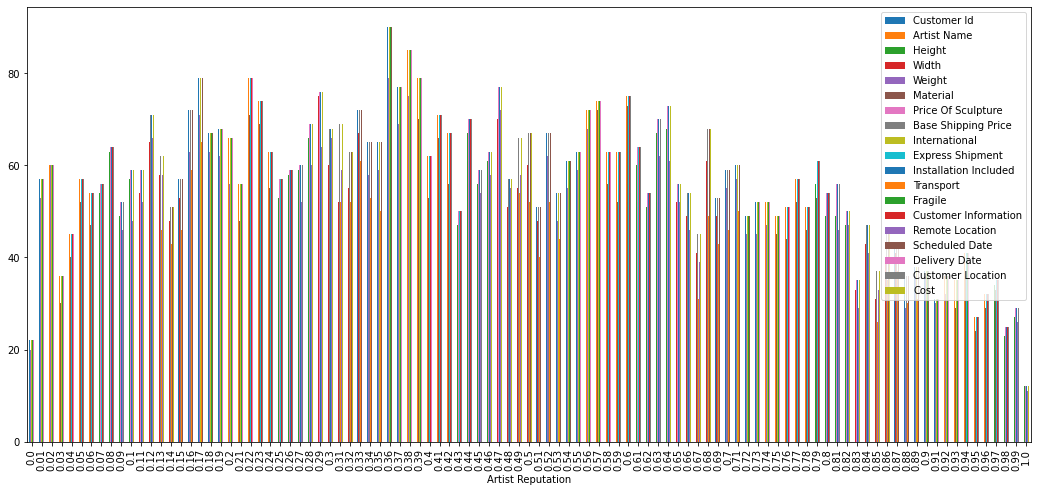

In [35]:
# group data by Artist Reputation and plot count plot


train_data.groupby('Artist Reputation').count().plot(kind = 'bar',figsize = (18,8))


from above graph:
1. All data for each value of Artist Reputation is distributed unequally.
2. But for overall data distribution of Artist Reputation is symmetrical

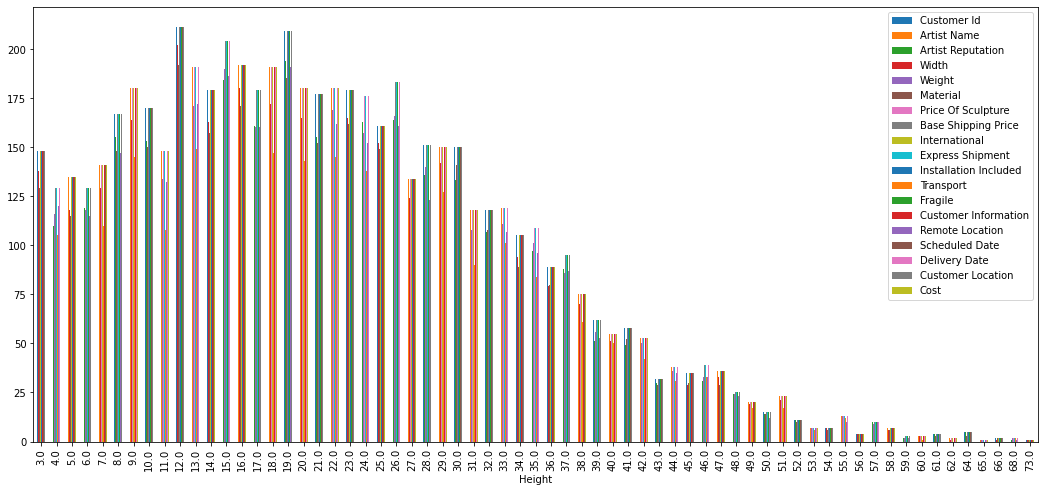

In [36]:
# group data by Height and plot count plot

train_data.groupby('Height').count().plot(kind = 'bar',figsize = (18,8))


from above graph:
1. All data for each value of Height is distributed unequally.
2. But for overall data distribution of Height is skewed left.

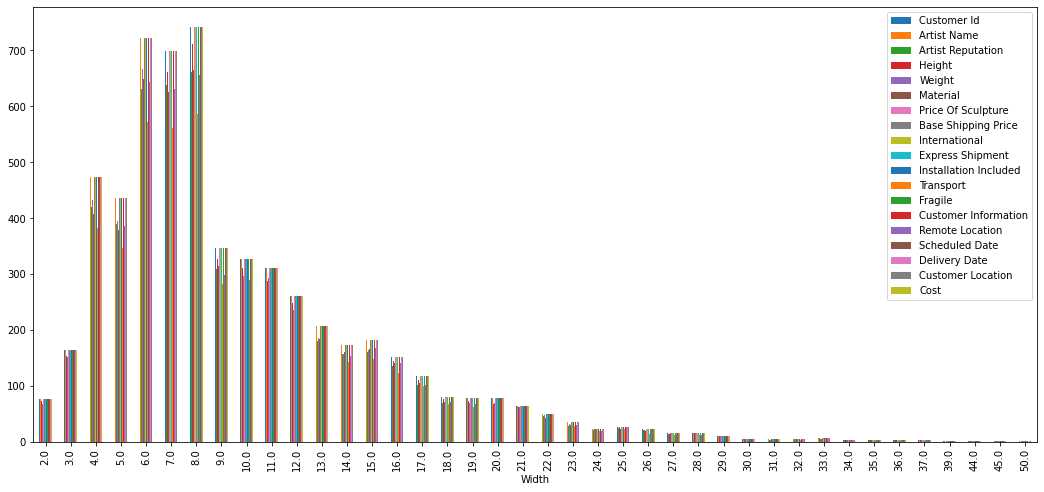

In [37]:
# group data by Width and plot count plot
train_data.groupby('Width').count().plot(kind = 'bar',figsize = (18,8))




from above graph:
1. All data for each value of Width is distributed unequally.
2. But for overall data distribution of Width is skewed left.

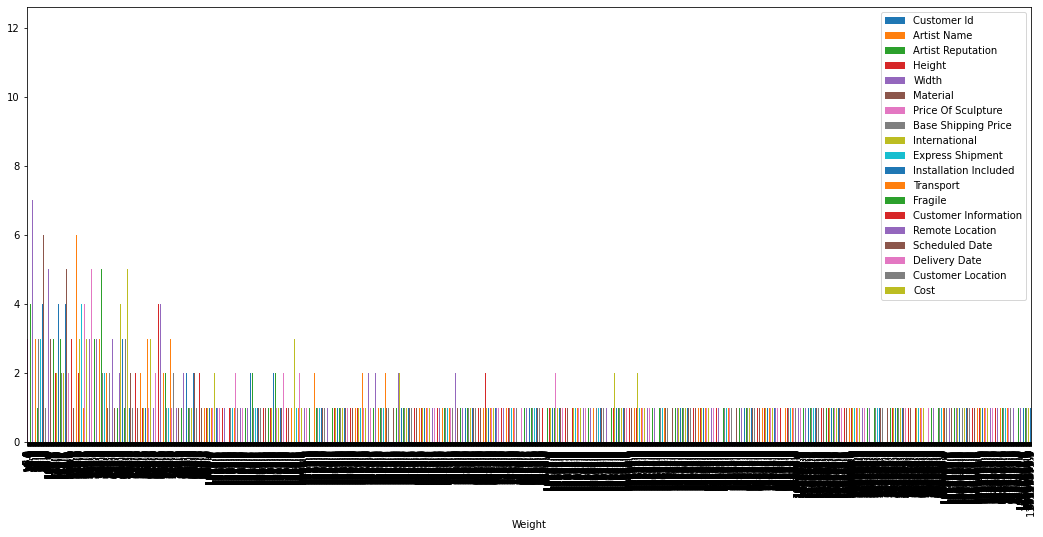

In [38]:
# group data by Weight and plot count plot


train_data.groupby('Weight').count().plot(kind = 'bar',figsize = (18,8))


from above graph:
1. All data for each value of Weight is distributed unequally.
2. But for overall data distribution of Weight is skewed left.

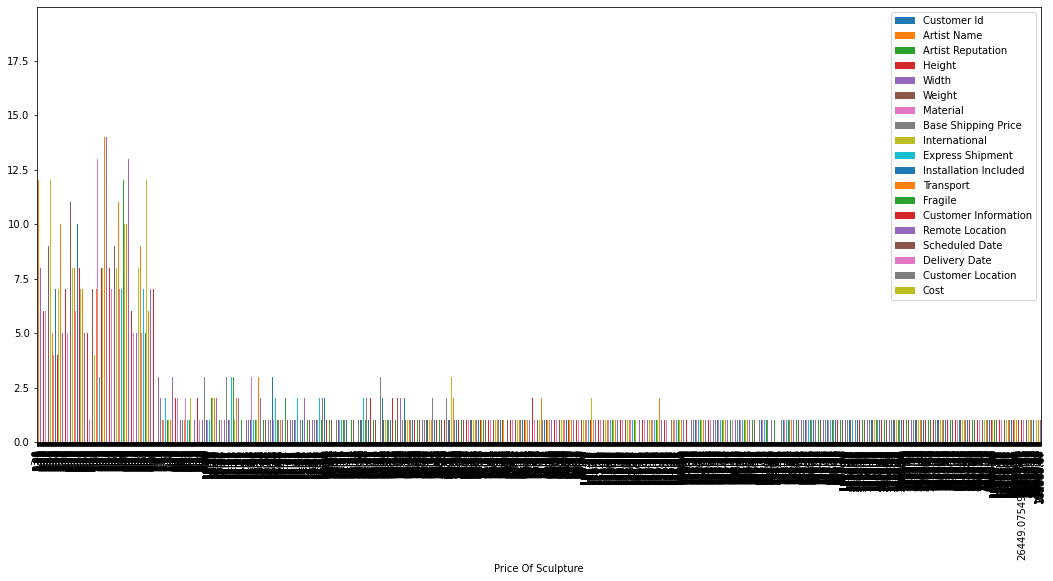

In [ ]:
# group data by Price Of Sculpture and plot count plot

train_data.groupby('Price Of Sculpture').count().plot(kind = 'bar',figsize = (18,8))



from above graph:
1. All data for each value of Price Of Sculpture is distributed unequally.
2. But for overall data distribution of Price Of Sculpture is skewed left.

In [ ]:
# group data by Base Shipping Price and plot count plot

train_data.groupby('Base Shipping Price').count().plot(kind = 'bar',figsize = (18,8))




from above graph:
1. All data for each Base Shipping Price value is distributed unequally.
2. Base Shipping Price is skewed left.

In [ ]:
# group data by International and plot count plot

train_data.groupby('International').count().plot(kind = 'bar',figsize = (18,8))



from above graph:
1. Number of varibales having "No" as value of international is almost double the number of varibales having "Yes" value.

In [ ]:
# group data by Express Shipment and plot count plot

train_data.groupby('Express Shipment').count().plot(kind = 'bar',figsize = (18,8))




from above graph:
1. Number of variables having "No" as value Express Shipment is almost double the number of variables having "Yes" value.

In [ ]:
# group data by Installation Included and plot count plot

train_data.groupby('Installation Included').count().plot(kind = 'bar',figsize = (18,8))




from above graph:
1. Number of variables having "No" as value international is almost double the number of variables having "Yes" value.

In [ ]:
# group data by Transport and plot count plot

train_data.groupby('Transport').count().plot(kind = 'bar',figsize = (18,8))



1. Number of variables having value as Roadways is greater than Number of variables having value Airways
2. Number of variables having value Waterways is half as compared to those of Airways and Roadways

In [ ]:
# group data by Fragile and plot count plot


train_data.groupby('Fragile').count().plot(kind = 'bar',figsize = (18,8))


from above graph:
1. 10% of the Sculptures are Fragile

In [ ]:
# group data by Customer Information and plot count plot


train_data.groupby('Customer Information').count().plot(kind = 'bar',figsize = (18,8))


from above graph

Most of the customers blongs to Working class.

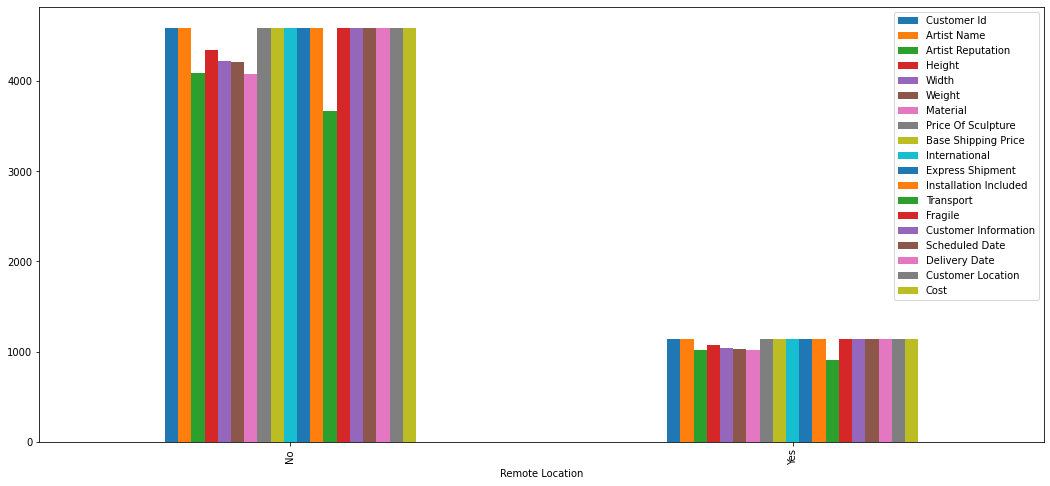

In [ ]:
# group data by Remote Location and plot count plot


train_data.groupby('Remote Location').count().plot(kind = 'bar',figsize = (18,8))



from above graph:
1. Number sample having remote location is double the number of sample which are not.

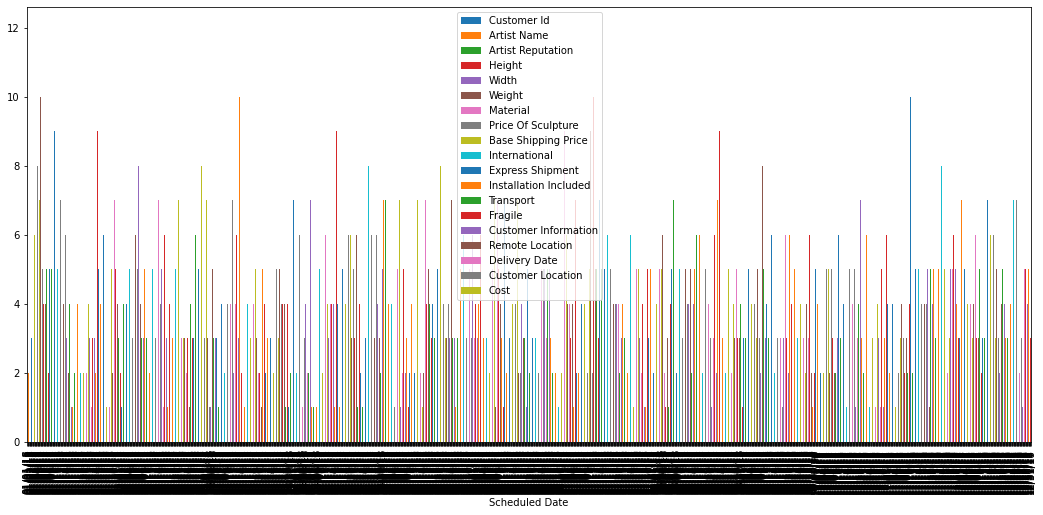

In [ ]:
# group data by Scheduled Date and plot count plot

train_data.groupby('Scheduled Date').count().plot(kind = 'bar',figsize = (18,8))



from above graph:
1. All data for each Scheduled Date is distributed  unequally.

In [ ]:
# group data by Delivery Date and plot count plot


train_data.groupby('Delivery Date').count().plot(kind = 'bar',figsize = (18,8))


from above graph:
1. All data for each Delivery Date is distributed unequally.

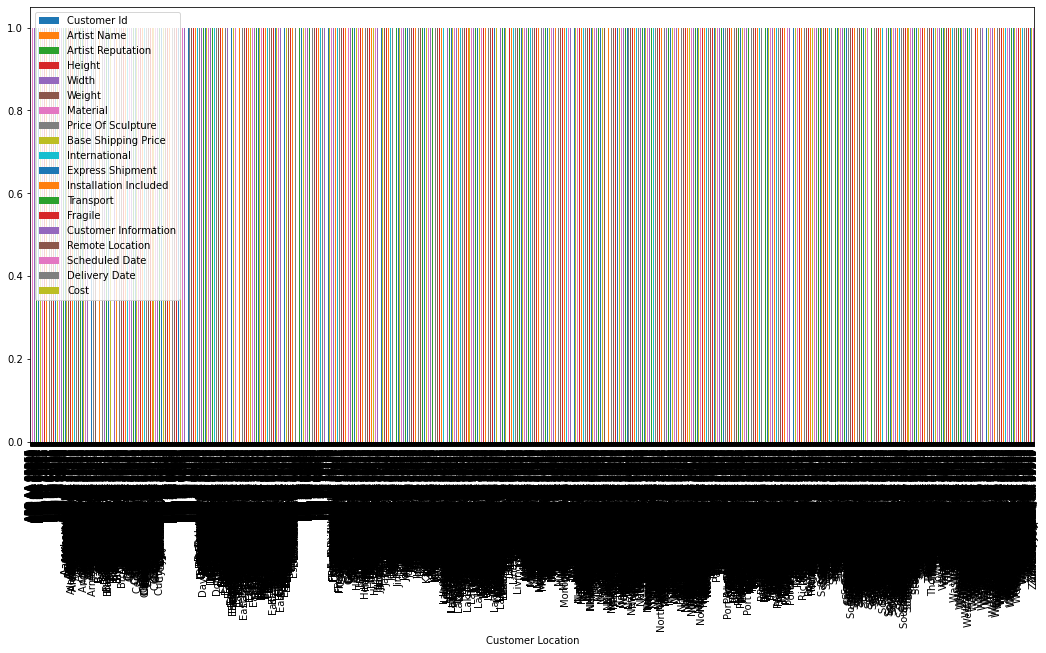

In [ ]:
# group data by Customer Location and plot count plot

train_data.groupby('Customer Location').count().plot(kind = 'bar',figsize = (18,8))




from above graph:
1. All data for each customer locaton value is distributed equally.

In [ ]:
# group data by Cost and plot count plot



train_data.groupby('Cost').count().plot(kind = 'bar',figsize = (18,8))

# Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


In [ ]:
# box plot using pandas 
# box plot for Artist Reputation column
train_data.boxplot(column = 'Artist Reputation',figsize = (15,10))
plt.show()




from above box plot graph:

- Artist reputation
  1. 25% of Artist reputation have value between range 0 to 0.24.
  2. 25% of Artist reputation have value between range 0.24 to 0.45.
  3. 25% of Artist reputation have value between range 0.45 to 0.68.
  4. 25% of Artist reputation have value between range 0.68 to 1.


- The mean Artist Reputation is around 0.45

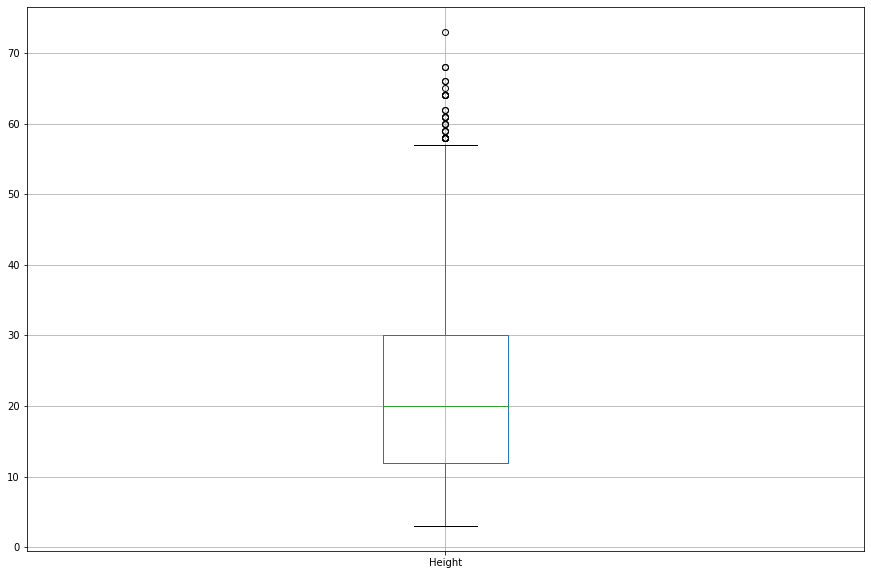

In [ ]:
# box plot using pandas 
# box plot for Height column

train_data.boxplot(column = 'Height',figsize = (15,10))
plt.show()



from above box plot graph:

- Height
  1. 25% of Heigth have value between range 3 to 12.
  2. 25% of Artist reputation have value between range 12 to 20.
  3. 25% of Artist reputation have value between range 20 to 30.
  4. 25% of Artist reputation have value between range 30 to 73.


- The mean Height is around 20.

In [ ]:
# box plot using pandas 
# box plot for Width column 

train_data.boxplot(column = 'Width',figsize = (15,10))
plt.show()



from above box plot graph:

- Width
  1. less than 25% of Width have value between range 2 to 6.
  2. less 50% of Width have value between range 2 to 8.
  3. less than 75% of Width have value between range 2 to 12.
  4. More than 25% Width have value between range 12 to 22.
  5. very few values of width are in range between 22 to 50. that is these are outliers


- The mean Width is around 10

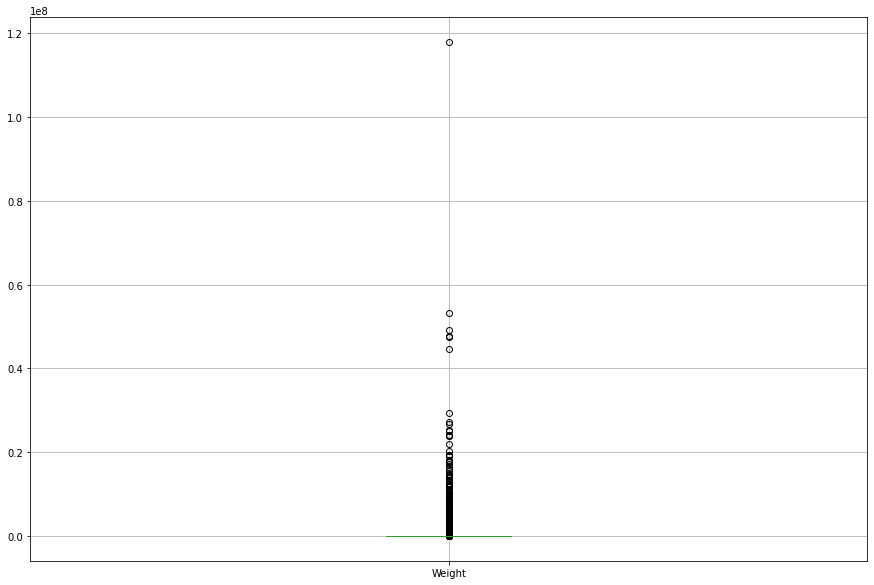

In [ ]:
# box plot using pandas 
# box plot for Weight column 


train_data.boxplot(column = 'Weight',figsize = (15,10))
plt.show()


from above box plot graph:

- Height
  1. less than Height of Width have value between range 2 to 6.
  2. less 50% of Height have value between range 2 to 8.
  3. less than 75% of Height have value between range 2 to 12.
  4. More than 25% Height have value between range 12 to 22.
  5. very few values of Height are in range between 22 to 50. that is these are outliers


- The mean Height is around 10

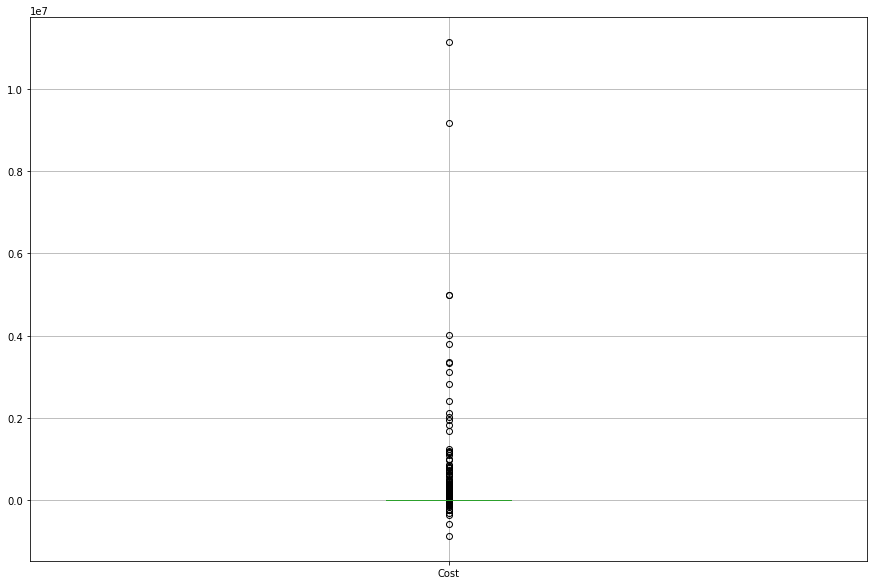

In [ ]:
# box plot using pandas 
# box plot for Cost column 

train_data.boxplot(column = 'Cost',figsize = (15,10))
plt.show()



from above box plot graph:

- Cost
  1. Most of the Cost value is around 0
  2. very few values are above 0.2. that is they are outliers

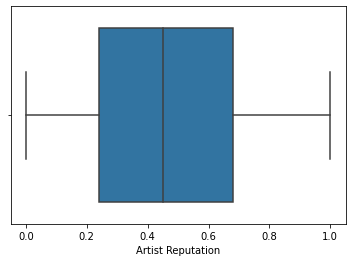

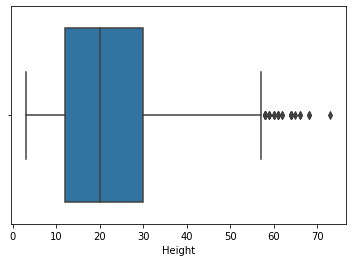

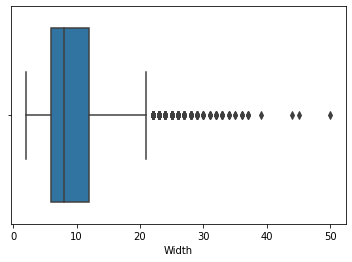

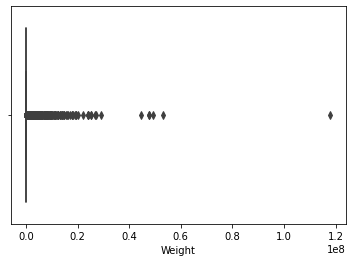

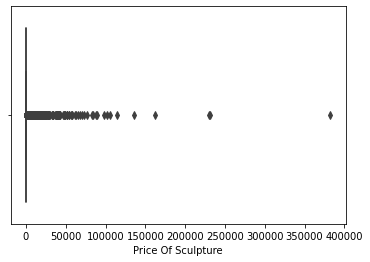

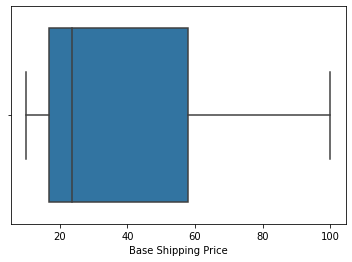

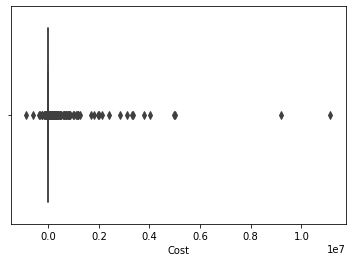

In [ ]:
# box plot using seaborn 
import seaborn as sns
for x in var_list:
  sns.boxplot(train_data[x])
  plt.show()



# Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

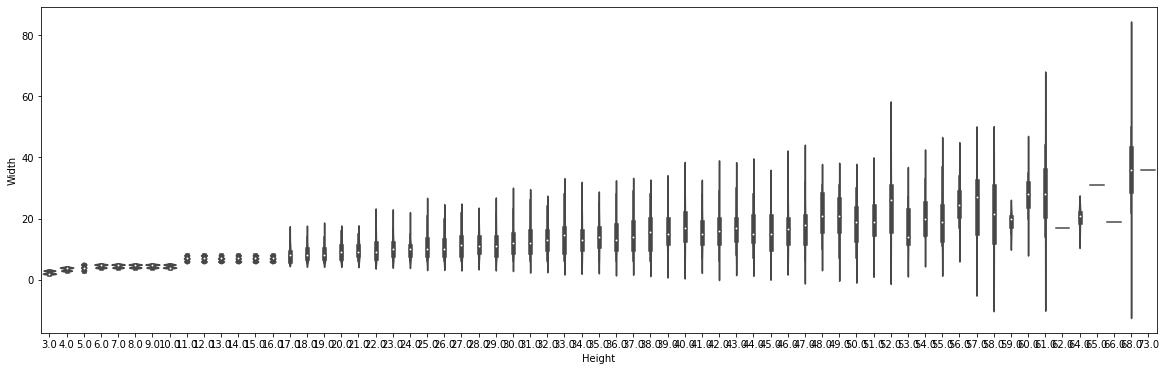

In [ ]:
# violin plot for Height and Width columns

plt.figure(figsize = (20,6))
sns.violinplot(x = 'Height',y = 'Width',data = train_data,palette = 'rainbow')
plt.show()



from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is almost symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The Width range is increasing as we move right on the axis of Height

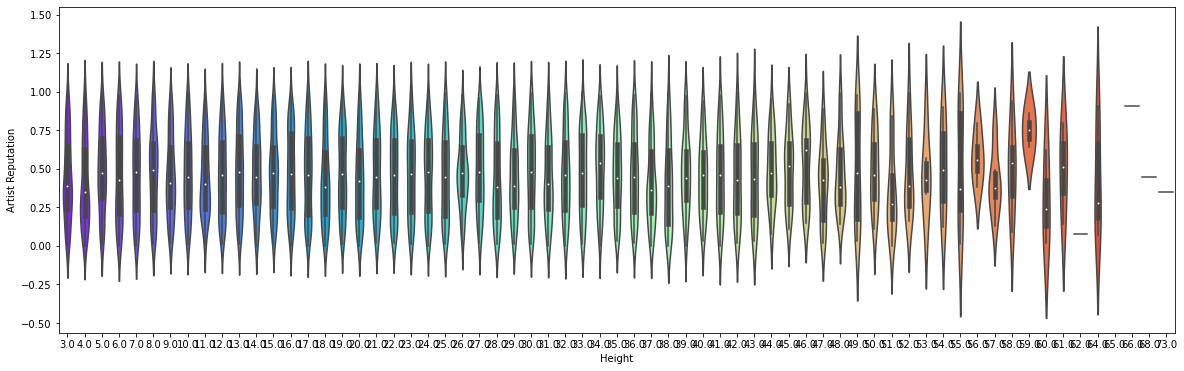

In [ ]:
# violin plot for Height and Artist Reputation columns

plt.figure(figsize = (20,6))
sns.violinplot(x = 'Height',y = 'Artist Reputation',data = train_data,palette = 'rainbow')
plt.show()



from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is almost symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

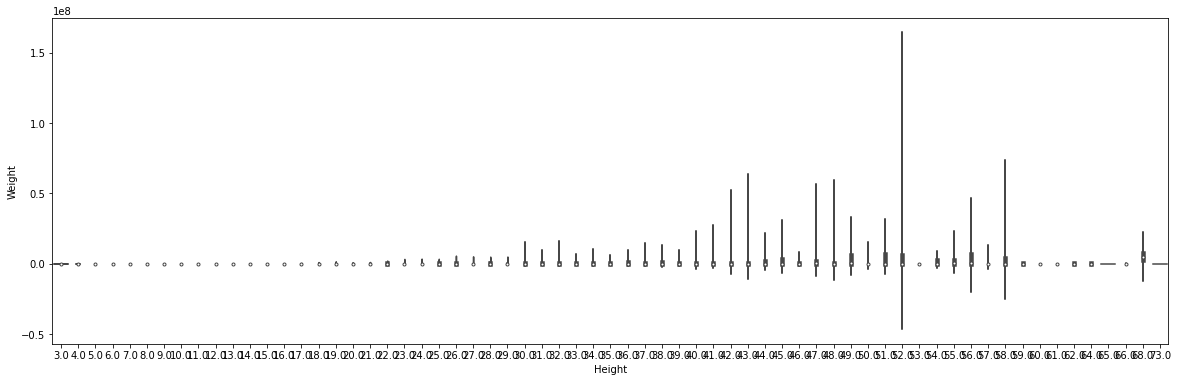

In [ ]:
# violin plot for Height and Weight columns


plt.figure(figsize = (20,6))
sns.violinplot(x = 'Height',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()



from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is almost symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. Weight distribution for all values of height is simmilar.
4. The Weight range is increasing and then decreases as we move right on the axis of Height

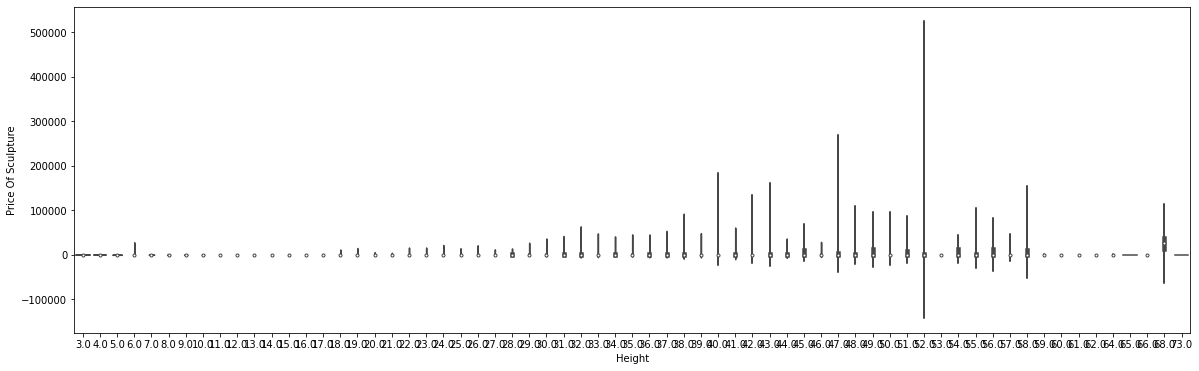

In [ ]:
# violin plot for Height and Price Of Sculpture columns

plt.figure(figsize = (20,6))
sns.violinplot(x = 'Height',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()




from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is almost symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. Price Of Sculpture distribution for all values of height is simmilar.
4. The Price Of Sculpture range is increasing and then decreases as we move right on the axis of Height
5. There is very weak correlataion between Price Of Sculpture and Height.

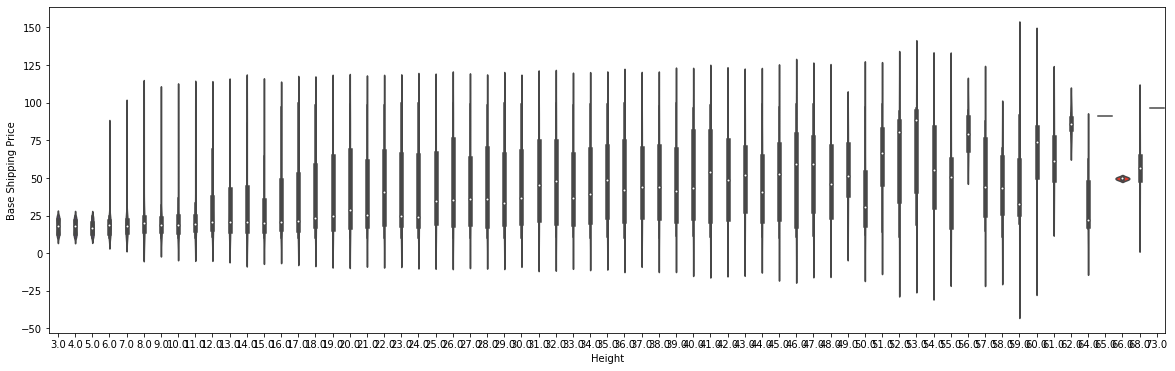

In [ ]:
# violin plot for Height and Base Shipping Price columns


plt.figure(figsize = (20,6))
sns.violinplot(x = 'Height',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()




from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is unsymmetrical.

2. Also there is higher observation probability at the between first quartile and third quartile.

3. Base Shipping Price distribution for all values of height is not simmilar.

4. The Base Shipping Price range is increasing and then decreases as we move right on the axis of Height

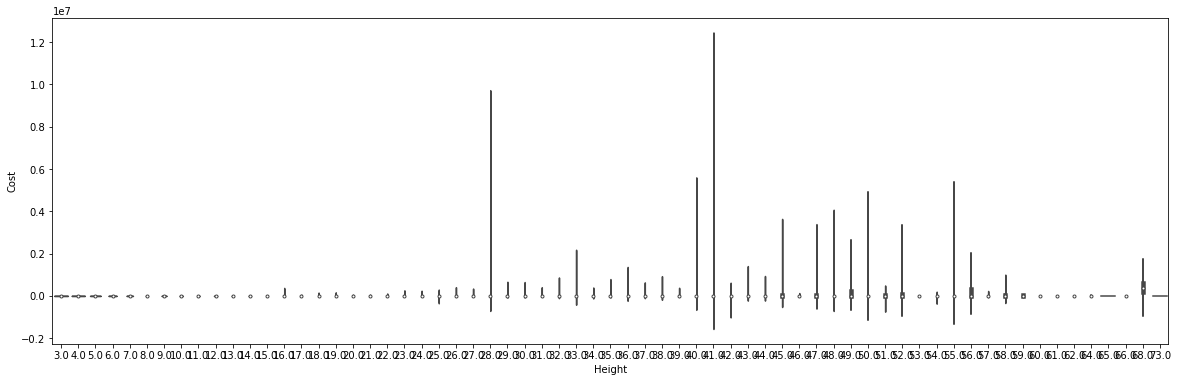

In [ ]:
# violin plot for Height and Cost columns

plt.figure(figsize = (20,6))
sns.violinplot(x = 'Height',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()





from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is almost symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. Cost distribution for all values of height is simmilar.
4. The Cost range is increasing and then decreases as we move right on the axis of Height

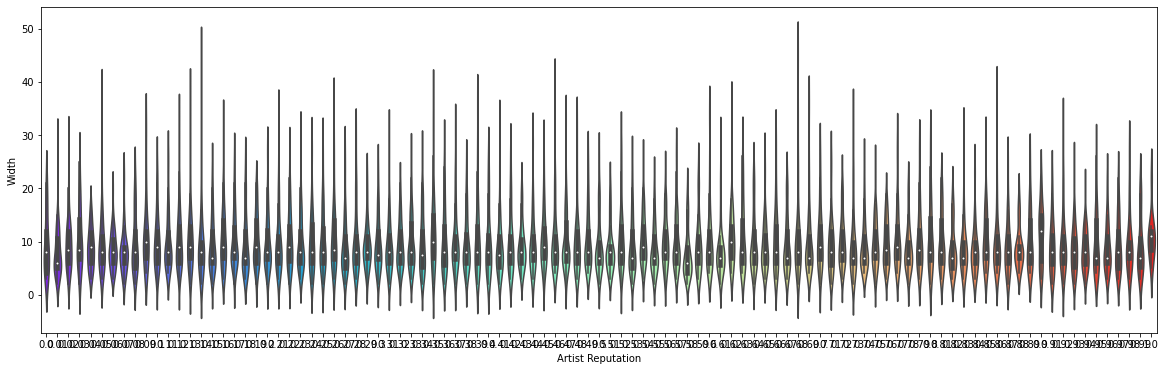

In [ ]:
# violin plot for Artist Reputation and Width columns

plt.figure(figsize = (20,6))
sns.violinplot(x = 'Artist Reputation',y = 'Width',data = train_data,palette = 'rainbow')
plt.show()





from above violin plot:

1. Width distribution for all values of Artist Reputation is simmilar.

2. The Width and Artist Reputation have no correlation

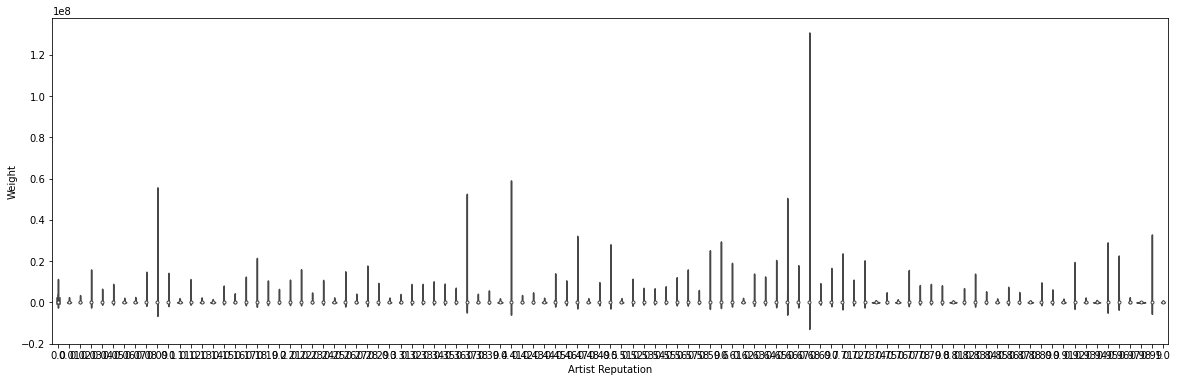

In [ ]:
# violin plot for Artist Reputation and Weight columns


plt.figure(figsize = (20,6))
sns.violinplot(x = 'Artist Reputation',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()



from above violin plot:

1. Weight distribution for all values of Artist Reputation is simmilar.

2. The Weight and Artist Reputation have no correlation

In [ ]:
# violin plot for Artist Reputation and Price Of Sculpture columns
plt.figure(figsize = (20,6))
sns.violinplot(x = 'Artist Reputation',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()



from above violin plot:

1. Price Of Sculpture distribution for all values of Artist Reputation is simmilar.

2. The Price Of Sculpture and Artist Reputation have no correlation

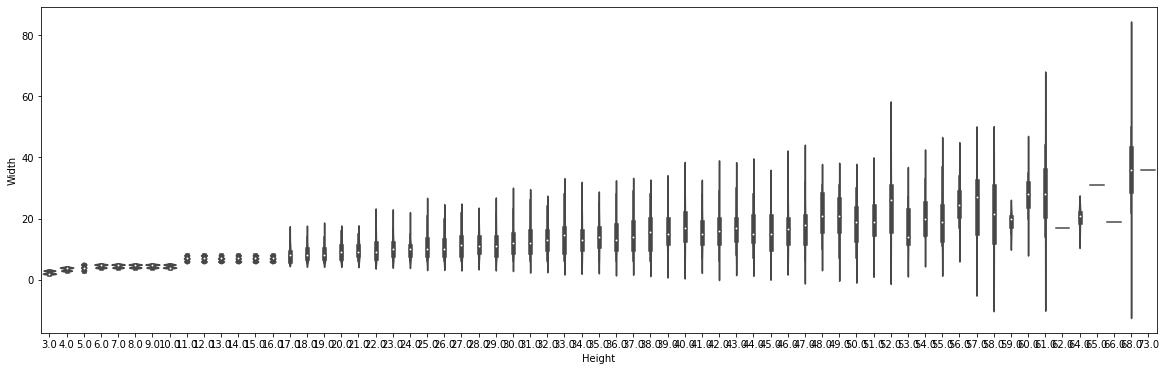

In [ ]:
# violin plot for Artist Reputation and Base Shipping Price columns

plt.figure(figsize = (20,6))
sns.violinplot(x = 'Height',y = 'Width',data = train_data,palette = 'rainbow')
plt.show()




from above violin plot:

1. Base Shipping Price distribution for all values of Artist Reputation is simmilar.

2. The Base Shipping Price and Artist Reputation have no correlation

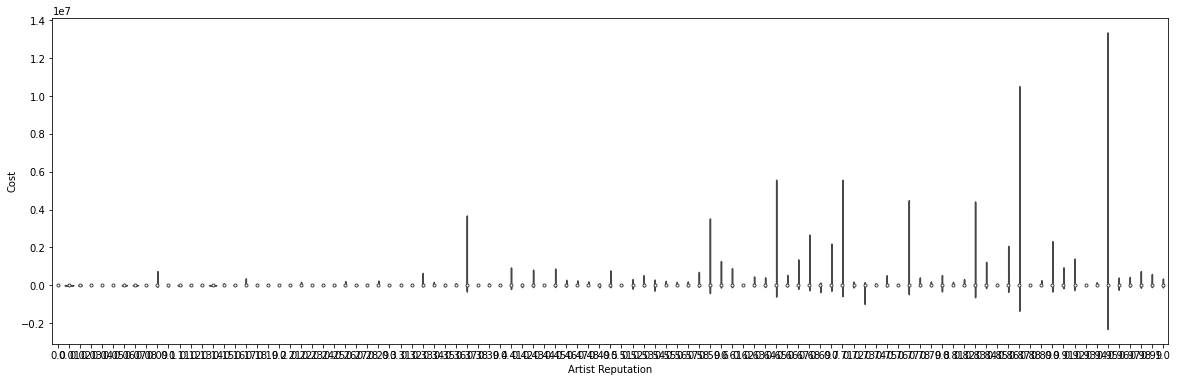

In [ ]:
# violin plot for Artist Reputation and Cost columns


plt.figure(figsize = (20,6))
sns.violinplot(x = 'Artist Reputation',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()



from above violin plot:

1. Cost distribution for all values of Artist Reputation is simmilar.

2. The Cost and Artist Reputation have no correlation

In [ ]:
# violin plot for Width and Weight columns

plt.figure(figsize = (20,6))
sns.violinplot(x = 'Width',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()




from above violin plot:

The Weight and Width have very weak correlation

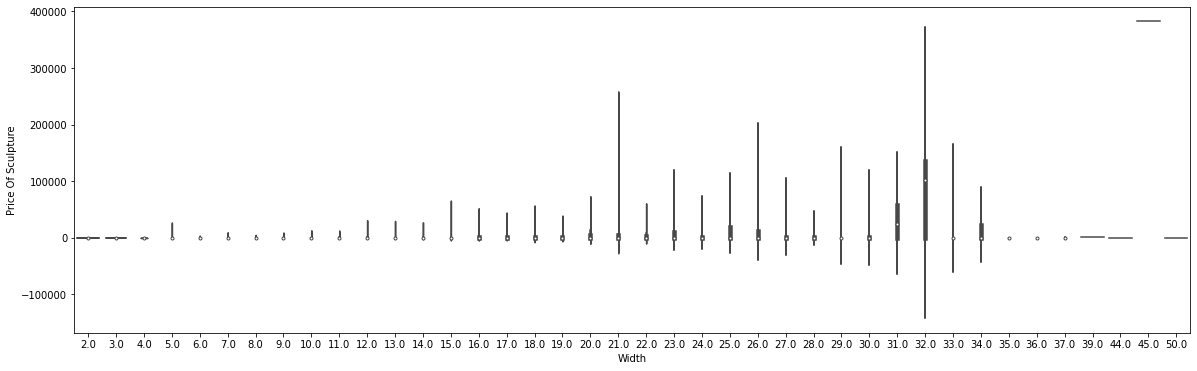

In [ ]:
# violin plot for Width and Price Of Sculpture columns
plt.figure(figsize = (20,6))
sns.violinplot(x = 'Width',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()





from above violin plot:

The Price Of Sculpture and Width have very weak correlation

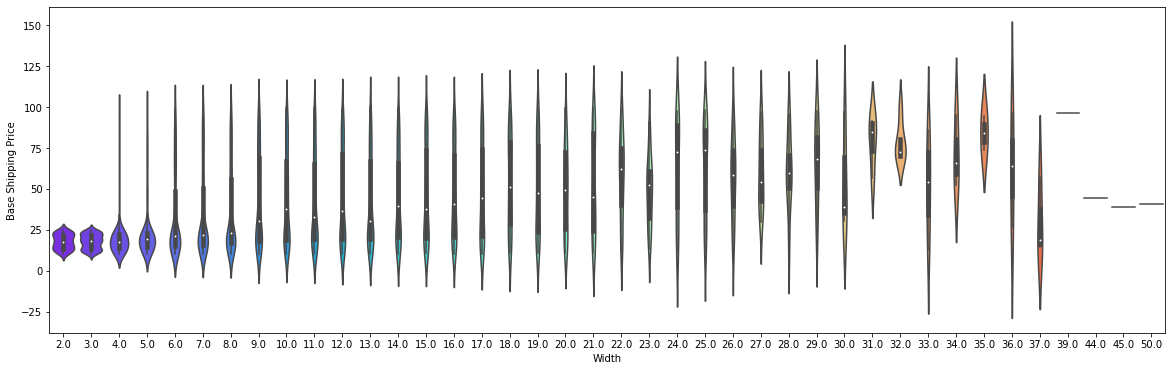

In [ ]:
# violin plot for Width and Base Shipping Price columns

plt.figure(figsize = (20,6))
sns.violinplot(x = 'Width',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()




from above violin plot:

The Base shipping price and Width are weakly correlated

In [ ]:
# violin plot for Width and Cost columns


plt.figure(figsize = (20,6))
sns.violinplot(x = 'Width',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()



from above violin plot:

The Cost and Width have no correlation

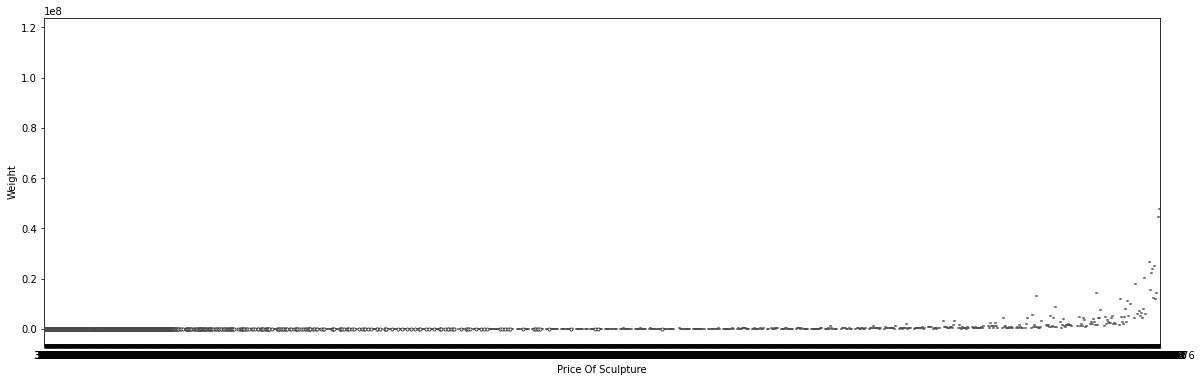

In [ ]:
# violin plot for Price Of Sculpture and Weight columns
plt.figure(figsize = (20,6))
sns.violinplot(x = 'Price Of Sculpture',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()





from above violin plot:

Values of cost is almost around zero for weight at the begining but starts to show high change in value for larger values of price of sculpture  

In [ ]:
# violin plot for Price Of Sculpture and Cost columns


plt.figure(figsize = (20,6))
sns.violinplot(x = 'Price Of Sculpture',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()




from above violine plot:
the highest priced scuplture have larger weight than low price sculpture.

In [ ]:
# violin plot for Weight and Base Shipping Price columns


plt.figure(figsize = (20,6))
sns.violinplot(x = 'Weight',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()




from above violin plot:

The Base Shipping and Weight have very weak correlation

In [ ]:
# violin plot for Weight and Cost columns

plt.figure(figsize = (20,6))
sns.violinplot(x = 'Weight',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()




from above violin plot:

Values of cost is almost around zero for weight at the begining but starts to show high change in value for larger values of weight  

In [ ]:
# violin plot for Base Shipping Price and Price Of Sculpture columns

plt.figure(figsize = (20,6))
sns.violinplot(x = 'Base Shipping Price',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()




from above violin plot:

The Base Shipping and Price of Sculpture have no correlation

In [ ]:
# violin plot for Price Of Sculpture and Cost columns


plt.figure(figsize = (20,6))
sns.violinplot(x = 'Price Of Sculpture',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()




from above violin plot:

Values of cost is almost around zero for price of sculpture at the begining but starts to show high change in value for larger values of price of sculpture

In [ ]:
# violin plot for Base Shipping Price and Cost columns


plt.figure(figsize = (20,6))
sns.violinplot(x = 'Base Shipping Price',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()




from above violin plot:

Values of cost is almost around zero for Base Shipping Price at the begining but starts to show high change in value for larger values of Base Shipping Price.


# Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


In [ ]:
# Boxen plot for Artist Reputation and Height columns

plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Artist Reputation',y = 'Height',data = train_data,palette = 'rainbow')
plt.show()




from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. There is no relation between height and Artist Reputation

In [ ]:
# Boxen plot for Artist Reputation and Width columns


plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Artist Reputation',y = 'Width',data = train_data,palette = 'rainbow')
plt.show()




from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. There is no relation between Width and Artist Reputation

In [ ]:
# Boxen plot for Artist Reputation and Weight columns


plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Artist Reputation',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()




from above boxen plot:

values of weight are between 0.0 to 0.2 for most values of Artist reputation but there are some values above 0.2

In [ ]:
# Boxen plot for Artist Reputation and Price Of Sculpture columns



plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Artist Reputation',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()



from above boxen plot:

values of price of sculpture are between 0.0 to 50000 for most values of Artist reputation but there are some values above 50000

In [ ]:
# Boxen plot for Artist Reputation and Base Shipping Price columns




plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Artist Reputation',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()



from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. There is no rcorelation between Base Shipping Price and Artist Reputation

In [ ]:
# Boxen plot for Artist Reputation and Cost columns


plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Artist Reputation',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()





from above boxen plot:

values of cost are between 0.0 to 0.1 for most values of Artist reputation but there are some values above 0.1

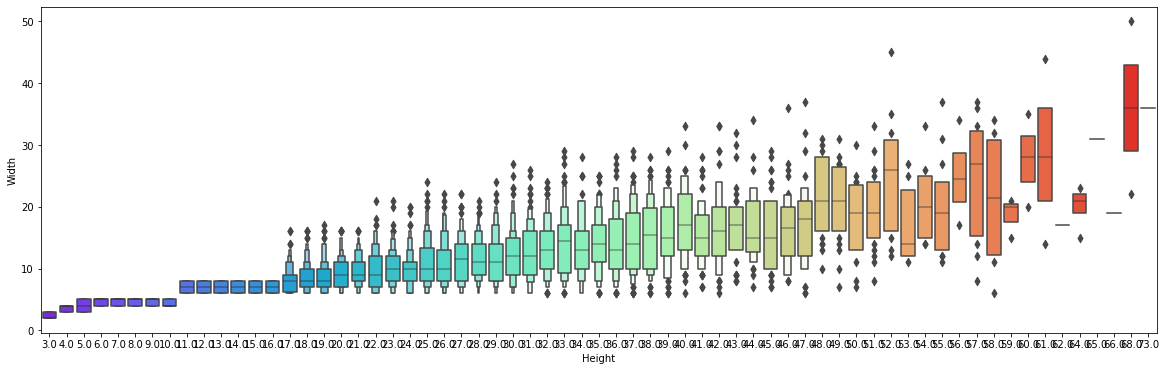

In [ ]:
# Boxen plot for Height and Width columns




plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Height',y = 'Width',data = train_data,palette = 'rainbow')
plt.show()



from above boxen plot:
1. There is a positive correlation between height and Width.

In [ ]:
# Boxen plot for Height and Weight columns


plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Height',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()






from above boxen plot:

range of values of weight increases with increase in height values and then decreases with decrease in height value.

values of weight are between 0.0 to 0.2 for most values of Height but there are some values above 0.2

In [ ]:
# Boxen plot for Height and Price Of Sculpture columns


plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Height',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()




from above boxen plot:

range of values of weight price of sculpture with increase in height values and then decreases with decrease in height value.

values of weight are between 0.0 to 50000 for most values of Height but there are some values above 50000

In [ ]:
# Boxen plot for Height and Base Shipping Price columns




plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Height',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()



from above boxen plot:

1. There is weak correlation between height and Base Shipping Price

In [ ]:
# Boxen plot for Height and Cost columns


plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Height',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()






In [ ]:
# Boxen plot for Width and Weight columns

plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Width',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()



from above boxen plot:

1. There is very weak relation between Width and Weight

In [ ]:
# Boxen plot for Width and Price Of Sculpture columns

plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Width',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()



from above boxen plot:

1. There is very weak correlation between Width and Price Of Sculpture

In [ ]:
# Boxen plot for Width and Base Shipping Price columns


plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Width',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()




from above boxen plot:

1. There is weak correlation between Width and Base Shipping Price

In [ ]:
# Boxen plot for Width and Cost columns


plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Width',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()




from above boxen plot:

1. There is weak correlation between Width and cost Price also there are many outliers

In [ ]:
# Boxen plot for Weight and Price Of Sculpture columns



plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Weight',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()



In [ ]:
# Boxen plot for Weight and Base Shipping Price columns

plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Weight',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()


from above boxen plot:

1. There is very weak correlation between Weight and Base Shipping Price

In [ ]:
# Boxen plot for Weight and Cost columns

plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Weight',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()





from above boxen plot:

values of cost are between 0.0 to 0.1 for most values of Weight but there are some values above 0.1

In [ ]:
# Boxen plot for Price Of Sculpture and Base Shipping Price columns



plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Price Of Sculpture',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()



from above boxen plot:

1. There is very weak correlation between Price Of Sculpture and Base Shipping Price

In [ ]:
# Boxen plot for Price Of Sculpture and Cost columns

plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Price Of Sculpture',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()




from above boxen plot:

Values of cost is almost around zero for price of sculpture at the begining but starts to show high change in value for larger values of price of sculpture

In [ ]:
# Boxen plot for Base Shipping Price and Cost columns

plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Base Shipping Price',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()





from above boxen plot:

Values of cost is almost around zero for Base Shipping Price at the begining but starts to show high change in value for larger values of Base Shipping Price.


# Point Plot


1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

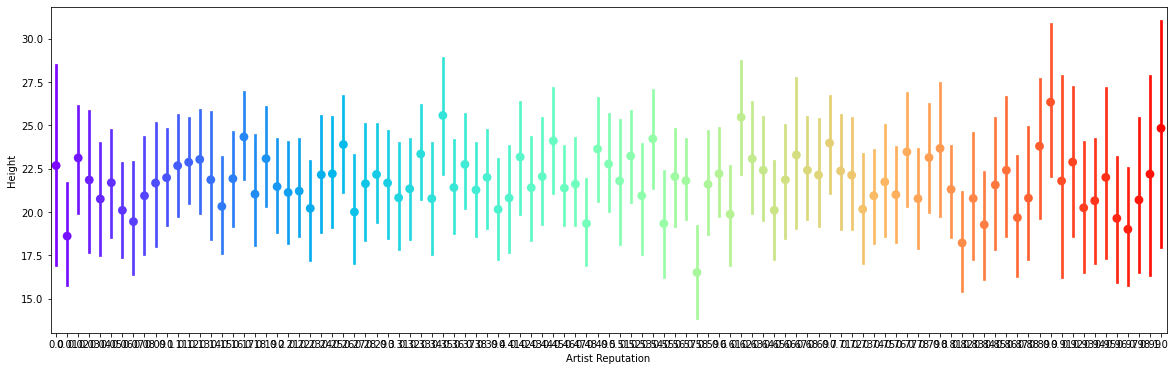

In [ ]:
# point plot for Artist Reputation and Height columns


plt.figure(figsize = (20,6))
sns.pointplot(x = 'Artist Reputation',y = 'Height',data = train_data,palette = 'rainbow')
plt.show()




From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the Height has standard deviations of vales for each Artist Reputation value

In [ ]:
# point plot for Artist Reputation and Width columns


plt.figure(figsize = (20,6))
sns.pointplot(x = 'Artist Reputation',y = 'Width',data = train_data,palette = 'rainbow')
plt.show()




From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the Width has standard deviations of vales for each Artist Reputation value

In [ ]:
# point plot for Artist Reputation and Weight columns


plt.figure(figsize = (20,6))
sns.pointplot(x = 'Artist Reputation',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()





From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the Weight has standard deviations of vales for each Artist Reputation value

In [ ]:
# point plot for Artist Reputation and Price Of Sculpture columns

plt.figure(figsize = (20,6))
sns.pointplot(x = 'Artist Reputation',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()





In [ ]:
# point plot for Artist Reputation and Base Shipping Price columns


plt.figure(figsize = (20,6))
sns.pointplot(x = 'Artist Reputation',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()




In [ ]:
# point plot for Artist Reputation and  Cost columns

plt.figure(figsize = (20,6))
sns.pointplot(x = 'Artist Reputation',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()







In [ ]:
# point plot for Artist Reputation and  Cost columns
plt.figure(figsize = (20,6))
sns.pointplot(x = 'Artist Reputation',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()





From above pointplot

1. Most of the points are around 0.
2. Very few points above 0.

In [ ]:
# point plot for Height and Widht columns

plt.figure(figsize = (20,6))
sns.pointplot(x = 'Height',y = 'Width',data = train_data,palette = 'rainbow')
plt.show()





From above point plot

There is a increase in width when there is a increase in Height.
That is both are correlated

In [ ]:
# point plot for Height and Weight columns
plt.figure(figsize = (20,6))
sns.pointplot(x = 'Height',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()







From above pointplot

1. Most of the points are around 0.
2. Very few points above 0.

In [ ]:
# point plot for Height and Price Of Sculpture columns


plt.figure(figsize = (20,6))
sns.pointplot(x = 'Height',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()




From above pointplot

1. Most of the points are around 0.
2. Very few points above 0.

In [ ]:
# point plot for Height and Base Shipping Price columns
plt.figure(figsize = (20,6))
sns.pointplot(x = 'Height',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()



From above point plot

There is a increase in Base Shipping Price when there is a increase in Height. That is they are correlated

In [ ]:
# point plot for Height and Cost columns
plt.figure(figsize = (20,6))
sns.pointplot(x = 'Height',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()





From above pointplot

1. Most of the points are around 0.
2. Very few points above 0.

In [ ]:
# point plot for Width and Weight columns
plt.figure(figsize = (20,6))
sns.pointplot(x = 'Width',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()


From above pointplot

1. Most of the points are around 0.
2. Very few points above 0.

In [ ]:
# point plot for Width and Price Of Sculpture columns
plt.figure(figsize = (20,6))
sns.pointplot(x = 'Width',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()





From above pointplot

1. Most of the points are around 0.
2. Very few points above 0.

In [ ]:
# point plot for Width and Base Shipping Price columns
plt.figure(figsize = (20,6))
sns.pointplot(x = 'Width',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()


From above point plot

There is a increase in Base Shipping Price when there is a increase in Width. That is both are correlated

In [ ]:
# point plot for Width and Cost columns
plt.figure(figsize = (20,6))
sns.pointplot(x = 'Width',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()





From above pointplot

1. Most of the points are around 0.
2. Very few points above 0.

# Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


In [ ]:
# count plot of whole datset based on Artist Reputation
plt.figure(figsize = (20,6))
sns.countplot(x = 'Artist Reputation',data = train_data,palette = 'rainbow')
plt.show()





From above count plot

distribution of values over complete dataset is symmetrical.

In [ ]:
# count plot of whole datset based on Height
plt.figure(figsize = (20,6))
sns.countplot(x = 'Height',data = train_data,palette = 'rainbow')
plt.show()





From above count plot

distribution of values over complete dataset are skewed left.

In [ ]:
# count plot of whole datset based on Width
plt.figure(figsize = (20,6))
sns.countplot(x = 'Width',data = train_data,palette = 'rainbow')
plt.show()



From above count plot

distribution of values over complete dataset are skewed left.

In [ ]:
# count plot of whole datset based on Weight
plt.figure(figsize = (20,6))
sns.countplot(x = 'Weight',data = train_data,palette = 'rainbow')
plt.show()




From above count plot

distribution of values over complete dataset are skewed left., multimodal

In [ ]:
# count plot of whole datset based on Price Of Sculpture
plt.figure(figsize = (20,6))
sns.countplot(x = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()





From above count plot

distribution of values over complete dataset are skewed left, multimodal.

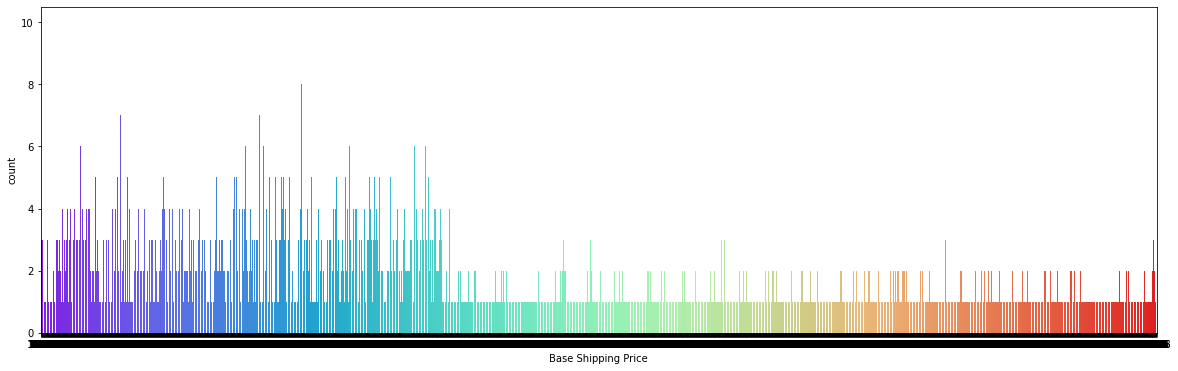

In [ ]:
# count plot of whole datset based on Base Shipping Price

plt.figure(figsize = (20,6))
sns.countplot(x = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()





From above count plot

distribution of values over complete dataset are skewed left, multimodal.

In [ ]:
# count plot of whole datset based on Cost

plt.figure(figsize = (20,6))
sns.countplot(x = 'Cost',data = train_data,palette = 'rainbow')
plt.show()






From above count plot

distribution of values over complete dataset are multi model that is more than one peak.

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

In [ ]:
# strip plot between Artist Reputation and Height columns
plt.figure(figsize = (20,6))
sns.stripplot(x = 'Artist Reputation',y = 'Height',data = train_data,palette = 'rainbow')
plt.show()







from above strip plot:

1. Most of the distribution of Height with repect to Artist Reputation is between 0 to 50.
2. few values are above 50

In [ ]:
# strip plot between Artist Reputation and Width columns
plt.figure(figsize = (20,6))
sns.stripplot(x = 'Artist Reputation',y = 'Width',data = train_data,palette = 'rainbow')
plt.show()






from above strip plot:

1. Most of the distribution of Width with repect to Artist Reputation is between 0 to 30.
2. few values are above 30

In [ ]:
# strip plot between Artist Reputation and Weight columns

plt.figure(figsize = (20,6))
sns.stripplot(x = 'Artist Reputation',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()





from above strip plot:

1. Most of the distribution of Weight with repect to Artist Reputation are between 0 and 0.1.
2. few values are above 0.1.

In [ ]:
# strip plot between Artist Reputation and Price Of Sculpture columns

plt.figure(figsize = (20,6))
sns.stripplot(x = 'Artist Reputation',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()







from above strip plot:

1. Most of the distribution of Price of Sculpture with repect to Artist Reputation is between 0 to 1000.
2. few values are above 1000

In [ ]:
# strip plot between Artist Reputation and Base Shipping Price columns

plt.figure(figsize = (20,6))
sns.stripplot(x = 'Artist Reputation',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()






from above strip plot:

1. Most of the distribution of Base shipping price with repect to Artist Reputation is between 0 to 30.
2. few values are between 30 to 100

In [ ]:
# strip plot between Artist Reputation and Cost columns

plt.figure(figsize = (20,6))
sns.stripplot(x = 'Artist Reputation',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()





from above strip plot:

1. Most of the distribution of Cost with repect to Artist Reputation are around 0
2. few values are above 0

In [ ]:
# strip plot between Height and Width columns
plt.figure(figsize = (20,6))
sns.stripplot(x = 'Height',y = 'Width',data = train_data,palette = 'rainbow')
plt.show()




from above strip plot:

1. There is growth in the width values as we move right on height axis.

In [ ]:
# strip plot between Height and Weight columns
plt.figure(figsize = (20,6))
sns.stripplot(x = 'Height',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()






from above strip plot:

1. Most of the distribution of Weight with repect to Height are between 0 to 0.1.
2. few values are above 0.1

In [ ]:
# strip plot between Height and Price Of Sculpture columns
plt.figure(figsize = (20,6))
sns.stripplot(x = 'Height',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()






from above strip plot:

1. Most of the distribution of Price Of Sculpture with repect to Height is between 0 to 1000.
2. few values are above 1000.

In [ ]:
# strip plot between Height and Base Shipping Price columns
plt.figure(figsize = (20,6))
sns.stripplot(x = 'Height',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()




from above strip plot:

1. Maximum of the distribution of Base Shipping Price with repect to Height is between 0 to 30.
2. remaining values are between 30 and 100.

In [ ]:
# strip plot between Height and Cost columns
plt.figure(figsize = (20,6))
sns.stripplot(x = 'Height',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()






from above strip plot:

1. Most of the distribution of Cost with repect to Height are between 0 and 0.1.
2. very few values are above 0.1.

In [ ]:
# strip plot between Width and Weight columns
plt.figure(figsize = (20,6))
sns.stripplot(x = 'Width',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()







from above strip plot:

1. Most of the distribution of Weight with repect to Width are between 0 to 0.1.
2. few values are above 0.1

In [ ]:
# strip plot between Width and Price Of Sculpture columns

plt.figure(figsize = (20,6))
sns.stripplot(x = 'Width',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()





from above strip plot:

1. Most of the distribution of Price Of Sculpture with repect to Width is between 0 to 1000.
2. few values are above 1000.

In [ ]:
# strip plot between Width and Base Shipping Price columns

plt.figure(figsize = (20,6))
sns.stripplot(x = 'Width',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()




from above strip plot:

1. Maximum of the distribution of Base Shipping Price with repect to Width is between 0 to 30.
2. remaining values are between 30 and 100.

In [ ]:
# strip plot between Width and Cost columns

plt.figure(figsize = (20,6))
sns.stripplot(x = 'Width',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()





from above strip plot:

1. Most of the distribution of Cost with repect to Width are between 0 and 0.1.
2. very few values are above 0.1.

In [ ]:
 # strip plot between Weight and Price Of Sculpture columns
plt.figure(figsize = (20,6))
sns.stripplot(x = 'Weight',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()




from above strip plot:

1. Most of the distribution of Price Of Sculpture with repect to Weight is between 0 to 1000.
2. But as the weight increases the Price Of Sculpture increases above 1000.

# Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


In [ ]:
# swarm plot for Artist Reputation and Height columns

plt.figure(figsize = (20,6))
sns.swarmplot(x = 'Artist Reputation',y = 'Height',data = train_data,palette = 'rainbow')
plt.show()






from above swarm plot:

1. Most of the distribution of Height with repect to Artist Reputation is between 0 to 50.
2. few values are above 50

In [ ]:
# swarm plot for Artist Reputation and Width columns


plt.figure(figsize = (20,6))
sns.swarmplot(x = 'Artist Reputation',y = 'Width',data = train_data,palette = 'rainbow')
plt.show()




from above swarm plot:

1. Most of the distribution of Width with repect to Artist Reputation is between 0 to 30.
2. few values are above 30

In [ ]:
# swarm plot for Artist Reputation and Weight columns

plt.figure(figsize = (20,6))
sns.swarmplot(x = 'Artist Reputation',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()





from above swarm plot:

1. Most of the distribution of Weight with repect to Artist Reputation are between 0 and 0.1.
2. few values are above 0.1.

In [ ]:
# swarm plot for Artist Reputation and Price Of Sculpture columns

plt.figure(figsize = (20,6))
sns.swarmplot(x = 'Artist Reputation',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()






from above swarm plot:

1. Most of the distribution of Price of Sculpture with repect to Artist Reputation is between 0 to 1000.
2. few values are above 1000

In [ ]:
# swarm plot for Artist Reputation and Base Shipping Price columns




plt.figure(figsize = (20,6))
sns.swarmplot(x = 'Artist Reputation',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()



from above swarm plot:

1. Most of the distribution of Base shipping price with repect to Artist Reputation is between 0 to 30.
2. few values are between 30 to 100

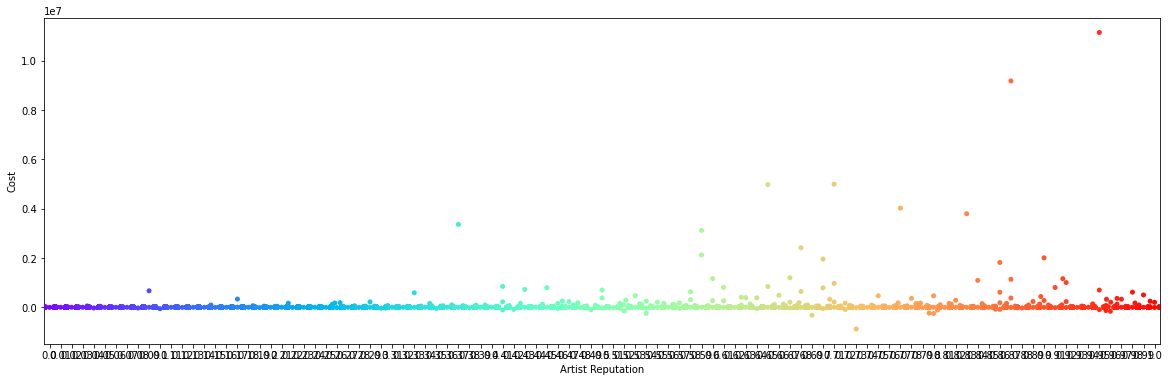

In [ ]:
# swarm plot for Artist Reputation and Cost columns

plt.figure(figsize = (20,6))
sns.swarmplot(x = 'Artist Reputation',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()






from above swarm plot:

1. Most of the distribution of Cost with repect to Artist Reputation are around 0
2. few values area bove 0

In [ ]:
# swarm plot for Height and Width columns

plt.figure(figsize = (20,6))
sns.swarmplot(x = 'Height',y = 'Width',data = train_data,palette = 'rainbow')
plt.show()





from above swarm plot:

1. There is growth in the width values as we move right on height axis.

In [ ]:
# swarm plot for Height and Weight columns

plt.figure(figsize = (20,6))
sns.swarmplot(x = 'Height',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()



from above swarm plot:

1. Most of the distribution of Weight with repect to Height are between 0 to 0.1.
2. few values are above 0.1

In [ ]:
# swarm plot for Height and Price Of Sculpture columns

plt.figure(figsize = (20,6))
sns.swarmplot(x = 'Height',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()




from above swarm plot:

1. Most of the distribution of Price Of Sculpture with repect to Height is between 0 to 1000.
2. few values are above 1000.

In [ ]:
# swarm plot for Height and Base Shipping Price columns


plt.figure(figsize = (20,6))
sns.swarmplot(x = 'Height',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()




from above swarm plot:

1. Maximum of the distribution of Base Shipping Price with repect to Height is between 0 to 30.
2. remaining values are between 30 and 100.

In [ ]:
# swarm plot for Height and Cost columns


plt.figure(figsize = (20,6))
sns.swarmplot(x = 'Height',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()





from above swarm plot:

1. Most of the distribution of Cost with repect to Height are between 0 and 0.1.
2. very few values are above 0.1.

In [ ]:
# swarm plot for Weight and Price Of Sculpture columns



plt.figure(figsize = (20,6))
sns.swarmplot(x = 'Weight',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()




from above swarm plot:

1. Most of the distribution of Price Of Sculpture with repect to Weight is between 0 to 1000.
2. But as the weight increases the Price Of Sculpture increases above 1000.

In [ ]:
# swarm plot for Weight and Cost columns


plt.figure(figsize = (20,6))
sns.swarmplot(x = 'Weight',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()




1. Most of the distribution of Cost with repect to Weight is between 0 to 0.1.
2. But as the weight increases the Price Of Sculpture increases above 0.1

# Combine Plots
combination of boxen plot and swarm plot.
Just to see the distribution of both graphs in one.

In [ ]:
# combine boxen and swarm plot for Artist Reputation and Height columns
plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Artist Reputation',y = 'Height',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Artist Reputation',y = 'Height',data = train_data,palette = 'rainbow')
plt.show()






from above combine plot:

1. Most of the distribution of Height with repect to Artist Reputation is between 0 to 50.
2. few values are above 50

In [ ]:
# combine boxen and swarm plot for Artist Reputation and Width columns

plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Artist Reputation',y = 'Width',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Artist Reputation',y = 'Width',data = train_data,palette = 'rainbow')
plt.show()





from above combine plot:

1. Most of the distribution of Width with repect to Artist Reputation is between 0 to 30.
2. few values are above 30



In [ ]:
# combine boxen and swarm plot for Artist Reputation and Weight columns
plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Artist Reputation',y = 'Weight',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Artist Reputation',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()






from above Combine plot:

1. Most of the distribution of Weight with repect to Artist Reputation are between 0 and 0.1.
2. few values are above 0.1.

In [ ]:
# combine boxen and swarm plot for Artist Reputation and Price Of Sculpture columns
plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Artist Reputation',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Artist Reputation',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()




from above combine plot:

1. Most of the distribution of Price of Sculpture with repect to Artist Reputation is between 0 to 1000.
2. few values are above 1000

In [ ]:
# combine boxen and swarm plot for Artist Reputation and Base Shipping Price columns


plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Artist Reputation',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Artist Reputation',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()



from above combine plot:

1. Most of the distribution of Base shipping price with repect to Artist Reputation is between 0 to 30.
2. few values are between 30 to 100

In [ ]:
# combine boxen and swarm plot for Artist Reputation and Cost columns
plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Artist Reputation',y = 'Cost',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Artist Reputation',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()






from above combine plot:

1. Most of the distribution of Cost with repect to Artist Reputation are around 0
2. few values area bove 0

In [ ]:
# combine boxen and swarm plot for Height and Width columns

plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Height',y = 'Width',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Height',y = 'Width',data = train_data,palette = 'rainbow')
plt.show()



from above combine plot:

1. There is growth in the width values as we move right on height axis.


In [ ]:
# combine boxen and swarm plot for Height and Weight columns
plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Height',y = 'Weight',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Height',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()





from above combine plot:

1. Most of the distribution of Weight with repect to Height are between 0 to 0.1.
2. few values are above 0.1


In [ ]:
# combine boxen and swarm plot for Height and Price Of Sculpture columns

plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Height',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Height',y = 'Price Of Sculpture',data = train_data,palette = 'rainbow')
plt.show()




from above combine plot:

1. Most of the distribution of Price Of Sculpture with repect to Height is between 0 to 1000.
2. few values are above 1000.




In [ ]:
# combine boxen and swarm plot for Height and Base Shipping Price columns
plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Height',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Height',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()






from above combine plot:

1. Maximum of the distribution of Base Shipping Price with repect to Height is between 0 to 30.
2. remaining values are between 30 and 100.

In [ ]:
# combine boxen and swarm plot for Height and Cost columns
plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Height',y = 'Cost',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Height',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()





from above combine plot:

1. Most of the distribution of Cost with repect to Height are between 0 and 0.1.
2. very few values are above 0.1.


In [ ]:
# combine boxen and swarm plot for Width and Weight columns

plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Width',y = 'Weight',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Width',y = 'Weight',data = train_data,palette = 'rainbow')
plt.show()





from above combine plot:

1. There is very weak relation between Width and Weight

In [ ]:
# combine boxen and swarm plot for Width and Base Shipping Price columns

plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Width',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Width',y = 'Base Shipping Price',data = train_data,palette = 'rainbow')
plt.show()




from above combine plot:

1. There is weak correlation between Width and Base Shipping Price

In [ ]:
# combine boxen and swarm plot for Width and Cost columns

plt.figure(figsize = (20,6))
sns.boxenplot(x = 'Width',y = 'Cost',data = train_data,palette = 'rainbow')
sns.swarmplot(x = 'Width',y = 'Cost',data = train_data,palette = 'rainbow')
plt.show()



from above combine plot:

1. There is weak correlation between Width and cost Price also there are many outliers

# Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

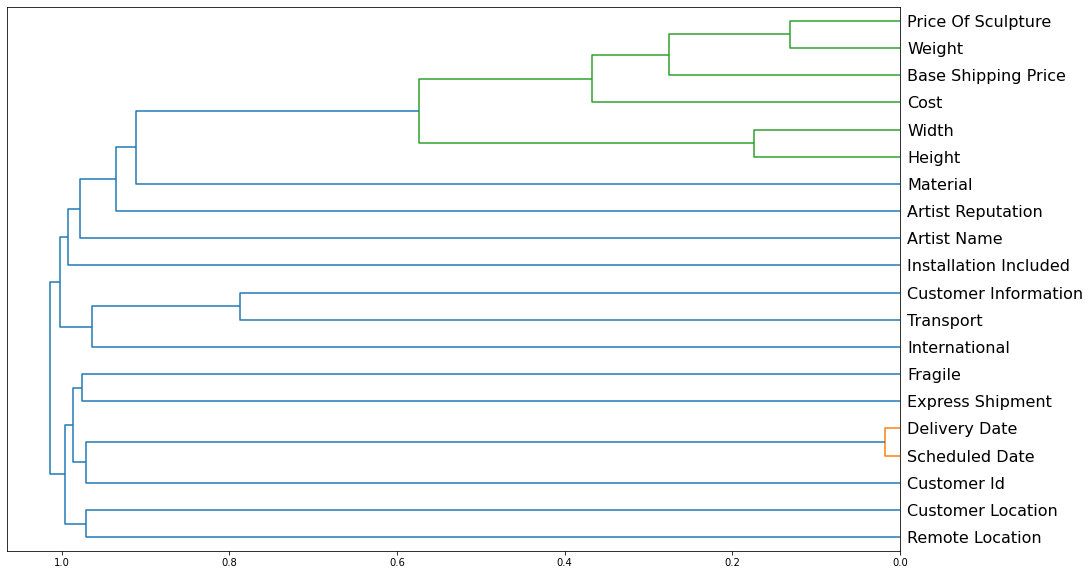

In [52]:
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values
X = train_data.dropna()

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed,method = 'average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,labels = X.columns, orientation = 'left',leaf_font_size = 16)
plt.show()



observation from dendrogram:

Price Of Scuplture , Weight, Base Shipping Price, Cost , Width Height are all correlated.

Cost depends on Price Of Scuplture , Weight, Base Shipping Price.

### What we learn after plotting the dataset
1. Data is very skewed in nature except for `Artist Reputation`  
1. There are also outliers in most of the columns  
1. We need to make the distribution of all the columns normal in nature 

# Scaling

In [53]:
# Calculating the mean and median of the columns 
Artist_Reputation_mean = train_data['Artist Reputation'].mean()
Height_mean = train_data['Height'].mean()
Width_mean = train_data['Width'].mean()
Weight_median = train_data['Weight'].median()

In [54]:
# Making a copy of the dataset 
train_data_copy = train_data.copy(deep = True)

# Extracting State code from the Customer Location column E.g. New Michelle, OH 50777 - State Code: OH 
train_data_copy['State Code'] = train_data_copy['Customer Location'].str.split(',',expand = True)[1].str.slice(0,3)


### Why missing values has to handled properly?

* Having missing values in your data is not necessarily a setback.  
* Still, it is an opportunity to perform the right feature engineering to guide the model to interpret the missing information the right way.  
* There are machine learning algorithms and packages that can automatically detect and deal with missing data.  
* However, it’s still recommended to transform the missing data manually through analysis and coding strategy.   
* Even in a well-designed and controlled study, missing data occurs in almost all research. Missing data can reduce the statistical power of a study and can produce biased estimates, leading to invalid conclusions.


### Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units. 
* The results would vary greatly between different units, 5kg and 5000gms. 
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. 
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

#### Scaling  Feature With Log Transform

In all of teh below cells we used np.log for scaling the features.
It is because the log transformation reduces or removes the skewness of our original data. It deals with large range of number 
for example:

log(10) = 1

log(100) = 2

log(10000) = 4 and so on.

It reduces these larger ranged values in dataset to small rnge numbers making it normal distribution/less-skewed distribution

In [55]:
# preparing data before feeding the model
# Helper function for preparing data with parameter datframe.
def prepare_data(df):
  # Drop the irrelevant columns from the dataset
  
  df.drop(['Customer Id','Artist Name'],axis = 1, inplace = True)

  # Filling missing values in the 'Artist Reputation' column
  df['Artist Reputation_NA'] = np.where(df['Artist Reputation'].isnull(),1,0)
  
  df['Artist Reputation'].fillna(Artist_Reputation_mean,inplace = True)
  
  # Filling missing values in the 'Transport' column
  df['Transport_NA'] = np.where(df['Transport'].isnull(),1,0)
  df['Transport'].fillna(df['Transport'].mode()[0],inplace = True)
 
 
  

  # Filling missing values in the 'Remote Location' column
  df['Remote_Location_NA'] = np.where(df['Remote Location'].isnull(),1,0)
  df['Remote Location'].fillna(df['Remote Location'].mode()[0],inplace = True)
  

  # Filling missing values in the 'Height' column
  df['Height_NA'] = np.where(df['Height'].isnull(),1,0)
  df['Height'].fillna(Height_mean,inplace = True)
  

  
  
  # Scaling the value in the 'Height' column
  df['Height'] = np.exp(df['Height'])
  
  
  # Filling missing values in the 'Width' column
  df['Width_NA'] =   np.where(df['Width'].isnull(),1,0)
  df['Width'].fillna(Width_mean,inplace = True)
  
  
  
  # Scaling the value in the 'Width' column
  df['Width'] = np.log(df['Width'])
  
  
  
  
  # Filling missing values in the 'Weight' column
  df['Weight_NA'] = np.where(df['Weight'].isnull(),1,0)
  df['Weight'].fillna(Weight_median,inplace = True)
  
  
  # Scaling the value in the 'Weight' column
  df['Weight'] = np.log(df['Weight'])
  
  
  # Filling missing values in the 'Material' column
  df['Material_NA'] = np.where(df['Material'].isnull(),1,0)
  df['Material'].fillna('NA',inplace = True)
  
  
  
  # Scale the value in the 'Price Of Sculpture' column
  df['Price Of Sculpture'] = np.log(df['Price Of Sculpture'])
  

  # Using column 'Delivery Date' and 'Scheduled Date' new column is made which the number of days it took to ship the sculpture i.e both column values difference
  df['Delivery Date'] = pd.to_datetime(df['Delivery Date'],format = '%m/%d/%y')
  df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'],format = '%m/%d/%y')
  df['del_date_sch_date_diff'] = (df['Delivery Date'] - df['Scheduled Date']).dt.days
  df['del_date_sch_date_diff'] = np.abs(df['del_date_sch_date_diff'])
  
  # Drop the 'Delivery Date' and 'Scheduled Date' columns after the new column is made
  
  df.drop(['Delivery Date','Scheduled Date'],axis = 1,inplace = True)
  
  # Extracting city, state code and pin from the 'Customer Location' column and making new columns for each
  df['city'] = df['Customer Location'].str.split(',',expand = True)[0]
  df['State_code'] = df['Customer Location'].str.split(',',expand = True)[1].str.slice(0,3)
  df['pin'] = df['Customer Location'].str.split(',',expand = True)[1].str.split(' ',expand = True)[2]

  city_others = df[df['State_code'].isna()]['Customer Location'].str.split(' ',expand = True)[0]
  city_others.index = df[df['State_code'].isnull()].index
  
  State_code_others = df[df['State_code'].isna()]['Customer Location'].str.split(' ',expand = True)[1]
  State_code_others.index = df[df['State_code'].isnull()].index
  
  pin_others = df[df['State_code'].isna()]['Customer Location'].str.split(' ',expand = True)[2]
  pin_others.index = df[df['pin'].isnull()].index
  
  df.loc[df['State_code'].isnull(), 'city'] = city_others
  df.loc[df['State_code'].isnull(), 'State_code'] = State_code_others
  df.loc[df['pin'].isnull(), 'pin'] = pin_others

  # Dropping the columns after their need is over
 
  df.drop(['Customer Location'],axis = 1, inplace = True)
  df.drop(['city','pin'],axis = 1, inplace = True)
 
  # return the prepared dataframe  
  return df

In [56]:
# passing the train data to prepare data function.
train_data = prepare_data(train_data)



### Now it's much more better than before data preparation


In [57]:
# Split the labels and the target
train_X = train_data.drop(['Cost'],axis = 1)

train_y = np.log(np.abs(train_data['Cost']))


### For doing some data transformation like Ordinal Encoding and One Hot Encoding we will use one library called *feature_engine*.  
Documentation: [Feature Engine](https://feature-engine.readthedocs.io/en/1.1.x/)

In [58]:
# Install feature_engine library
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 64.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


### One Hot Encoding Explanation

For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst.

Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the ordinal representation. This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable.

In [59]:
# Perform One-Hot Encoding

# Import OneHotEncoder from the feature_engine library 


from feature_engine.encoding import OneHotEncoder
# Instantiate the OneHotEncoder
ohe_enc = OneHotEncoder(top_categories = None)


# Fit the encoder with data
ohe_enc.fit(train_X)


# Transform the data according to the fit
train_X = ohe_enc.transform(train_X)



### Splitting the data into train and test set

In [60]:
# Import train_test_split from sklearn


from sklearn.model_selection import train_test_split
# train test split with 80% train data and 20% test data
X_train, X_test, Y_train, Y_test = train_test_split(train_X,train_y,test_size= 0.2)




In [61]:
# print head of xtrain



X_train.head()


,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Artist Reputation_NA,Transport_NA,Remote_Location_NA,Height_NA,Width_NA,Weight_NA,Material_NA,del_date_sch_date_diff,Material_Brass,Material_Clay,Material_Aluminium,Material_Wood,Material_Marble,Material_Bronze,Material_Stone,International_Yes,International_No,Express Shipment_Yes,Express Shipment_No,Installation Included_No,Installation Included_Yes,Transport_Airways,Transport_Roadways,Transport_Waterways,Fragile_No,Fragile_Yes,Customer Information_Working Class,Customer Information_Wealthy,Remote Location_No,Remote Location_Yes,State_code_ OH,State_code_ WY,State_code_ WA,State_code_ KY,State_code_ PA,State_code_ AL,State_code_ WV,State_code_ CA,State_code_ ND,State_code_ GA,State_code_ DC,State_code_ TX,State_code_ CO,State_code_AE,State_code_ OR,State_code_ MI,State_code_ NM,State_code_ AR,State_code_AP,State_code_ VT,State_code_ IA,State_code_ MN,State_code_ NH,State_code_ SC,State_code_AA,State_code_ OK,State_code_ HI,State_code_ RI,State_code_ LA,State_code_ DE,State_code_ ID,State_code_ CT,State_code_ MS,State_code_ FL,State_code_ VA,State_code_ MA,State_code_ KS,State_code_ ME,State_code_ NC,State_code_ NV,State_code_ MD,State_code_ SD,State_code_ WI,State_code_ MT,State_code_ IL,State_code_ AZ,State_code_ AK,State_code_ NY,State_code_ NJ,State_code_ TN,State_code_ NE,State_code_ MO,State_code_ IN,State_code_ UT
2430,0.07,2.415495e+07,2.079442,5.075174,1.504077,12.24,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1946,0.38,2.837542e+09,1.791759,8.039802,2.966303,98.93,0,0,0,1,0,1,1,3,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1904,0.37,1.446257e+12,2.197225,13.330887,8.241706,49.03,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
481,0.14,3.584913e+09,1.945910,6.989335,1.791759,21.37,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2664,0.94,7.896296e+13,2.639057,5.863631,1.736951,11.48,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Building the machine learning model on the processed dataset

In [62]:
# importing necessary libraries for getting metric of model
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())
    

# Function for calculating all the relevant metrics 
def print_score(m):
    # create a list varibale to store all metric result on model
    res = [rmse(m.predict(X_train), Y_train),rmse(m.predict(X_test), Y_test),
           m.score(X_train, Y_train),m.score(X_test, Y_test),
           median_absolute_error(m.predict(X_train), Y_train),median_absolute_error(m.predict(X_test), Y_test),
           metrics.mean_absolute_error(m.predict(X_train), Y_train),metrics.mean_absolute_error(m.predict(X_test), Y_test),
          ]
    
    # print all results of metric on model
    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')

In [63]:
# Visualize importance of all the features in the dataset for the prediction

# Helper function for Visualizing importance of all the features in the dataset for the prediction
def visualize_importance(feature_importances, feat_train_df):
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()
    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df,_df],axis = 0,ignore_index = True)
                                     
    
    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
    .sum()[['feature_importance']]\
    .sort_values('feature_importance',ascending = False).index[:50]

    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize = (8,max(6,len(order)*.25)))
    sns.boxenplot(data = feature_importance_df,
                  x = 'feature_importance',
                  y = 'column',
                  order = order,
                  ax = ax,
                  palette = 'viridis',
                  orient = 'h')
    
    ax.tick_params(axis = 'x',rotation = 0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    
    return fig, ax



### Linear Regression

RMSE-Train: 1.6665233882157477
RMSE-Test: 1.5956316615214974
Score-Train: 5.305540422484434e-05
Score-Test: -9.157942191251323e-07
MedAE-Train: 1.0483568610149518
MedAE-Test: 1.030680893694635
MeanAE-Train: 1.2337307132425013
MeanAE-Test: 1.1781498200355565 

CPU times: user 344 ms, sys: 169 ms, total: 513 ms
Wall time: 330 ms


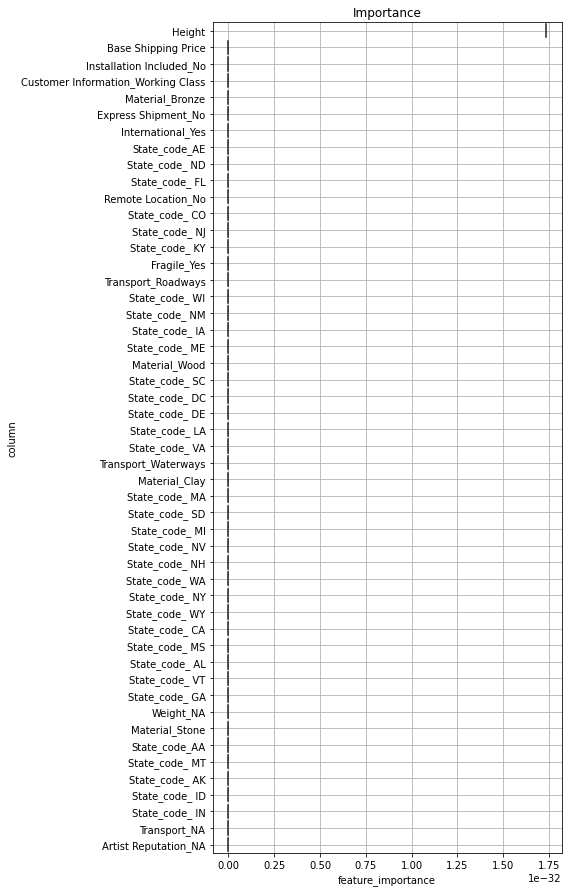

In [64]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor

from sklearn.linear_model import LinearRegression

# Instantiate the model
lModel = LinearRegression()


# Fit the model to the data

lModel.fit(X_train,Y_train)

# print score of the model
print_score(lModel)

# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_,train_X)



### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

RMSE-Train: 0.12548655331197098
RMSE-Test: 0.3425114485686251
Score-Train: 0.9943304509949545
Score-Test: 0.9539228835996828
MedAE-Train: 0.04928863606054623
MedAE-Test: 0.13321946596121537
MeanAE-Train: 0.07885803393323942
MeanAE-Test: 0.2107920706929334 

CPU times: user 6.46 s, sys: 53.2 ms, total: 6.52 s
Wall time: 6.57 s


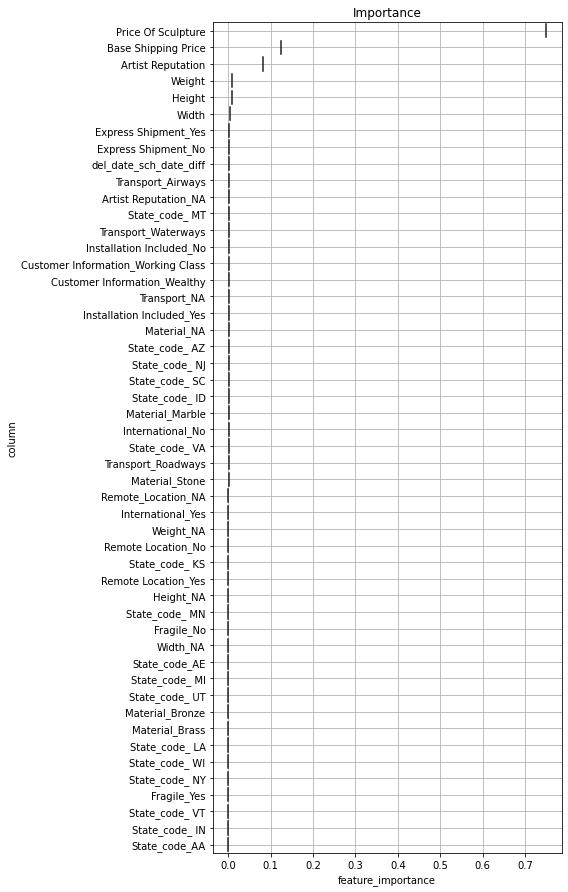

In [65]:
%%time

# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor

from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf= RandomForestRegressor()


# Fit the model to the data
rf.fit(X_train,Y_train)


# print score of the model


print_score(rf)
# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_,train_X)



### KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

In [66]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor

from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
knnr = KNeighborsRegressor()


# Fit the model to the data

knnr.fit(X_train,Y_train)

# print score of the model


print_score(knnr)

RMSE-Train: 1.430122025983716
RMSE-Test: 1.388508466825674
Score-Train: 0.26362281789503905
Score-Test: 0.24276239739740035
MedAE-Train: 0.5189109651001909
MedAE-Test: 0.5650885518745428
MeanAE-Train: 0.9293076845780822
MeanAE-Test: 0.9233210276199791 

CPU times: user 4.39 s, sys: 1.29 s, total: 5.68 s
Wall time: 3.82 s


### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train: 0.30261185320123
RMSE-Test: 0.3708021907671755
Score-Train: 0.9670294644088517
Score-Test: 0.9459967757641631
MedAE-Train: 0.1347406557994244
MedAE-Test: 0.13554477486286576
MeanAE-Train: 0.20153848345210848
MeanAE-Test: 0.22812454901205315 

CPU times: user 1.73 s, sys: 14.7 ms, total: 1.74 s
Wall time: 1.73 s


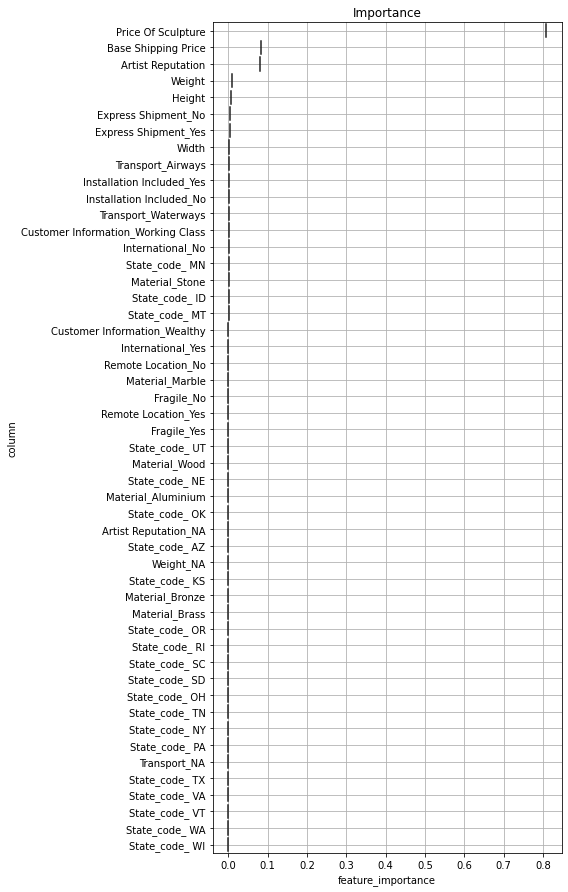

In [67]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
# Instantiate the model
GBR = GradientBoostingRegressor()


# Fit the model to the data
GBR.fit(X_train,Y_train)

# print score of the model
print_score(GBR)
# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_,train_X)



### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

RMSE-Train: 0.30261185320123
RMSE-Test: 0.3708021907671755
Score-Train: 0.9670294644088517
Score-Test: 0.9459967757641631
MedAE-Train: 0.1347406557994244
MedAE-Test: 0.13554477486286576
MeanAE-Train: 0.20153848345210848
MeanAE-Test: 0.22812454901205315 

CPU times: user 369 ms, sys: 18 ms, total: 387 ms
Wall time: 379 ms


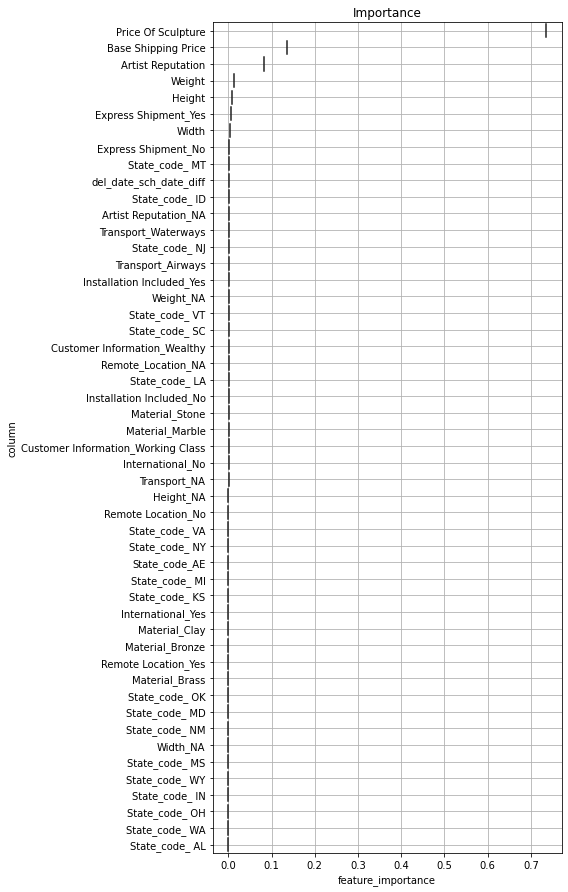

In [68]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor


# Instantiate the model
DTR = DecisionTreeRegressor()


# Fit the model to the data
DTR.fit(X_train,Y_train)


# print score of the model

print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(DTR.feature_importances_,train_X)



### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

RMSE-Train: 0.5836268666907124
RMSE-Test: 0.5847594772225089
Score-Train: 0.8773621060665628
Score-Test: 0.8656957841469035
MedAE-Train: 0.42726452484262056
MedAE-Test: 0.41132323995006725
MeanAE-Train: 0.4776704578816634
MeanAE-Test: 0.4743257783794757 

CPU times: user 1.88 s, sys: 52 ms, total: 1.93 s
Wall time: 1.95 s


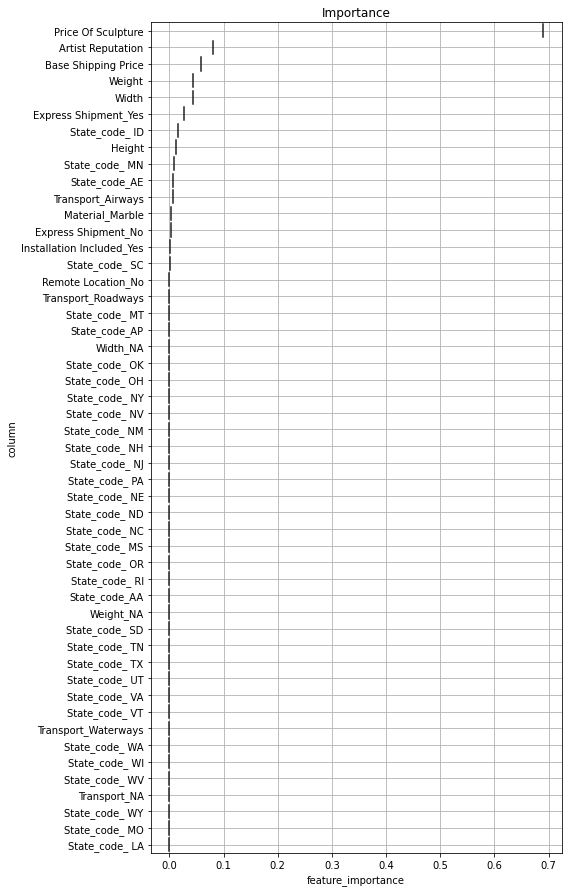

In [69]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor


# Instantiate the model
AdaBoost = AdaBoostRegressor()


# Fit the model to the data


AdaBoost.fit(X_train,Y_train)
# print score of the model
print_score(AdaBoost)


# visualizing the inportance of features.
fig, ax = visualize_importance(AdaBoost.feature_importances_,train_X)



### XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

[12:33:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train: 0.3091594662573752
RMSE-Test: 0.37174927578070593
Score-Train: 0.9655872618868815
Score-Test: 0.9457205586193014
MedAE-Train: 0.13534585986597492
MedAE-Test: 0.13049650792176593
MeanAE-Train: 0.20299442683453567
MeanAE-Test: 0.22809720106331338 

CPU times: user 1.49 s, sys: 21.2 ms, total: 1.51 s
Wall time: 1.69 s


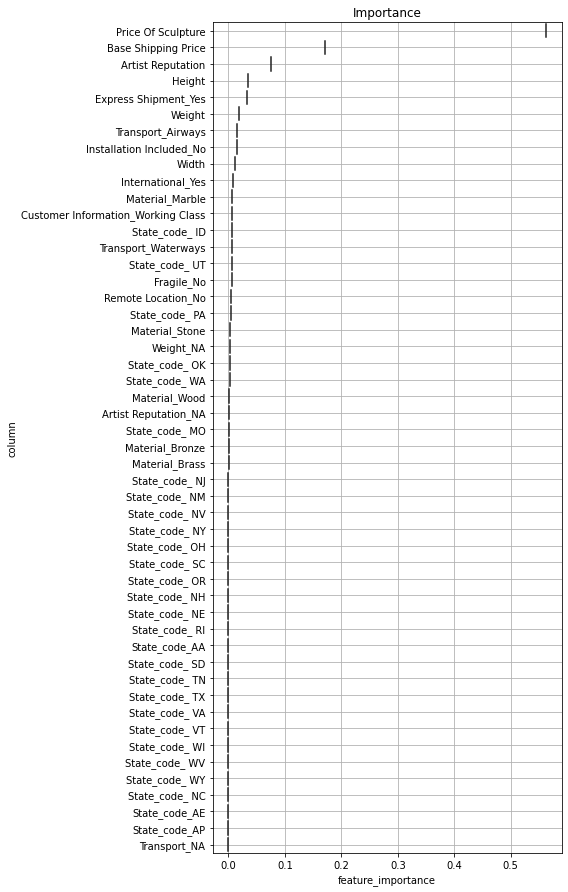

In [70]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor


# Instantiate the model
xgbr =XGBRegressor()

# Fit the model to the data

xgbr.fit(X_train,Y_train)

# print score of the model

print_score(xgbr)
# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_,train_X)



### Light Gradient Boosted Machine

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

RMSE-Train: 0.19363402677298677
RMSE-Test: 0.31447414123065137
Score-Train: 0.9865005061350881
Score-Test: 0.9611576956522633
MedAE-Train: 0.08456970185566037
MedAE-Test: 0.10488202952294623
MeanAE-Train: 0.12492059629768848
MeanAE-Test: 0.18139102839915436 

CPU times: user 688 ms, sys: 16.5 ms, total: 705 ms
Wall time: 743 ms


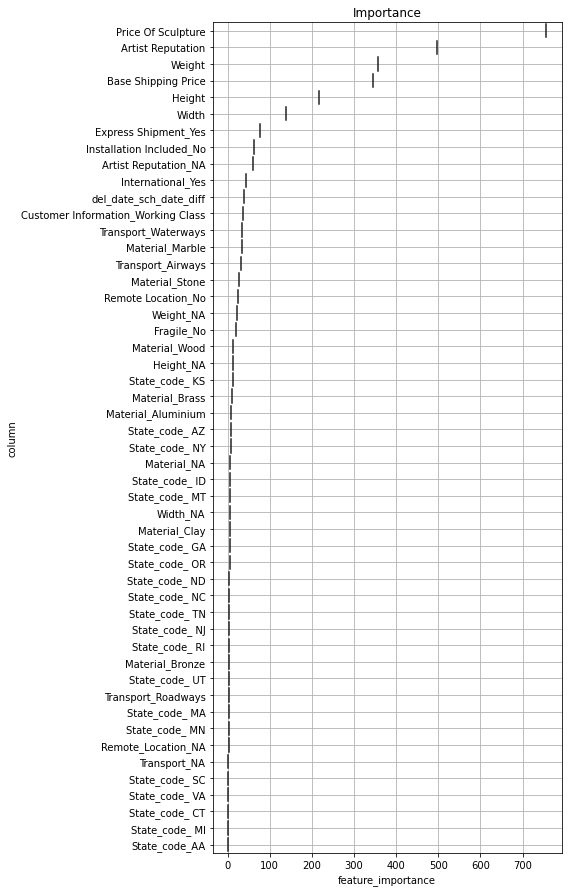

In [71]:
%%time
# Fit a lightgbm Regressor model to the train dataset

# Import lightgbm
import lightgbm as lgbm



# Instantiate the model
lg = lgbm.LGBMRegressor()

# Fit the model to the data
lg.fit(X_train,Y_train)

# print score of the model
print_score(lg)

# visualizing the inportance of features.
fig, ax = visualize_importance(lg.feature_importances_,train_X)




### Comparing all the model based on metric

In [72]:
# Helper function for calculating rmse using formula
def rmse(x,y):
       return math.sqrt(((x-y)**2).mean())

# comparison based on meterics for each model.
# Helper function for comparing model , parameters are model instance list, model name list,train test splitted data
def compare_models(models,names,X_train,y_train,X_test,y_test):
    # import the libraries we need
    import sklearn.metrics as metrics


    # now, create a dict with the list of metrics name 
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    # Create a datafram eto store result of metric on train data  
    result_train = pd.DataFrame(data)
    # Create a datafram eto store result of metric on test data 
    result_test = pd.DataFrame(data)
    
    # looping through models instance list and names list simultaneously using zip method
    for (model,name) in zip(models,names):
        # make prediction on test set
        y_pred= model.predict(X_test)
        # Store the result of each meteric result in a list
        res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
        # Add each meteric result to train and test dataframe for metric respectively
        result_train[name] = [res[0],res[2],res[4],res[6]]
        result_test[name] = [res[1],res[3],res[5],res[7]]
    
    # return train and test metric result dataframes
    return result_train,result_test

In [73]:
# create a list of objects of models
models= [lModel, DTR, rf, knnr, GBR, xgbr, AdaBoost]
# create a list of names of each model
names = ['Lr', 'Dtree', 'Forest', 'Knn','GBR', 'Xboost', 'AdaBoost']
# passing data for comparison
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)



#### RMSE of all model on train and test data

In [74]:
# printing rmse comparision of model on train and test

print(comp_model_train[:1])

print('\n')

print(comp_model_test[:1])


  Metric        Lr  Dtree    Forest       Knn       GBR    Xboost  AdaBoost
0   rmse  1.666523    0.0  0.125487  1.430122  0.302612  0.309159  0.583627


  Metric        Lr     Dtree    Forest       Knn       GBR    Xboost  AdaBoost
0   rmse  1.595632  0.467477  0.342511  1.388508  0.370802  0.371749  0.584759


#### All metrics on train and test data

In [75]:
# printing comparision of model on train set
print("Results on Train data")

comp_model_train


Results on Train data


,Metric,Lr,Dtree,Forest,Knn,GBR,Xboost,AdaBoost
0,rmse,1.666523,0.0,0.125487,1.430122,0.302612,0.309159,0.583627
1,MedAE,1.048357,0.0,0.049289,0.518911,0.134741,0.135346,0.427265
2,MAE,1.233731,0.0,0.078858,0.929308,0.201538,0.202994,0.477670
3,R-squared,-18846.221300,1.0,0.994150,-0.837420,0.964817,0.963097,0.858758


In [76]:
# printing comparision of model on test set
print("Results on Test data")

comp_model_test


Results on Test data


,Metric,Lr,Dtree,Forest,Knn,GBR,Xboost,AdaBoost
0,rmse,1.595632e+00,0.467477,0.342511,1.388508,0.370802,0.371749,0.584759
1,MedAE,1.030681e+00,0.217179,0.133219,0.565089,0.135545,0.130497,0.411323
2,MAE,1.178150e+00,0.318046,0.210792,0.923321,0.228125,0.228097,0.474326
3,R-squared,-4.762220e+07,0.912258,0.949001,-0.765468,0.939469,0.938931,0.838660


## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. 

Every machine learning models will have different hyperparameters that can be set.

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [77]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
    from sklearn.model_selection import RandomizedSearchCV

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    # Fit the random search model
    random = RandomizedSearchCV(estimator = model,param_distributions = param_grid,n_iter = 10,cv = 3,verbose = 2,random_state = 42,n_jobs = -1)
    # fit train data
    random.fit(X_train,Y_train)
    print("\n Best parameters: ",random.best_params_)

In [78]:
%%time
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 400, num = 50)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 9, num = 3)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestRegressor(),X_train,Y_train,param_grid = rf_para_grid)



Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best parameters:  {'n_estimators': 289, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 6, 'bootstrap': False}
CPU times: user 8.68 s, sys: 126 ms, total: 8.8 s
Wall time: 53.3 s


In [79]:
%%time
# create parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [x for x in range(200,500, 50)], 
 'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5],
 'max_depth': [x for x in range(5,17, 3)], 
 'min_samples_split': [x for x in range(2,10)]
}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(GradientBoostingRegressor(),X_train,Y_train,param_grid = GBR_para_grid)



Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best parameters:  {'n_estimators': 450, 'min_samples_split': 5, 'max_depth': 5, 'learning_rate': 0.2}
CPU times: user 11.6 s, sys: 152 ms, total: 11.7 s
Wall time: 3min 33s


In [80]:
%%time
# create parameters dict for tunning
knn_para_grid = {
                  'leaf_size' :list(range(1,10)),
                  'n_neighbors' : list(range(1,20)),
                  'p' :[1,2]
              }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(KNeighborsRegressor(),X_train,Y_train,param_grid = knn_para_grid)




Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best parameters:  {'p': 1, 'n_neighbors': 3, 'leaf_size': 2}
CPU times: user 276 ms, sys: 25.9 ms, total: 302 ms
Wall time: 14.3 s


In [81]:
%%time
# create parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
              }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(DecisionTreeRegressor(),X_train,Y_train,param_grid = DTR_para_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best parameters:  {'splitter': 'best', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 6, 'max_leaf_nodes': 80, 'max_features': 'auto', 'max_depth': 12}
CPU times: user 124 ms, sys: 9.09 ms, total: 133 ms
Wall time: 442 ms


In [82]:
%%time
# create parameters dict for tunning
Ada_para_grid = {
                  'n_estimators' :[10, 50, 100, 500],
                  'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
              }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(AdaBoostRegressor(),X_train,Y_train,param_grid = Ada_para_grid)



Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best parameters:  {'n_estimators': 500, 'learning_rate': 0.01}
CPU times: user 11.3 s, sys: 105 ms, total: 11.4 s
Wall time: 1min 11s


In [83]:
%%time
# create parameters dict for tunning
XGB_para_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(XGBRegressor(),X_train,Y_train,param_grid = XGB_para_grid)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[12:42:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Best parameters:  {'min_child_weight': 7, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}
CPU times: user 2.48 s, sys: 50.8 ms, total: 2.53 s
Wall time: 35.4 s


## Re training the models with the best parameters

### Random Forest Regressor

RMSE-Train: 0.4014280183605643
RMSE-Test: 0.48320369809200553
Score-Train: 0.9419810994362738
Score-Test: 0.9082944529303065
MedAE-Train: 0.21460958401512542
MedAE-Test: 0.22685293046252886
MeanAE-Train: 0.29067581044423296
MeanAE-Test: 0.32619528256585456 

CPU times: user 9.2 s, sys: 11.6 ms, total: 9.21 s
Wall time: 9.2 s


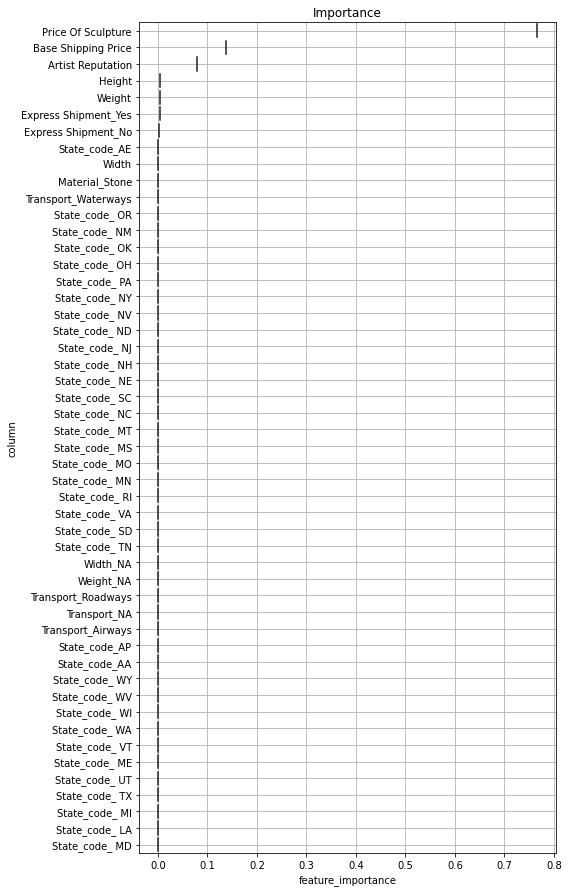

In [84]:
%%time

# Instantiate the model
rf= RandomForestRegressor(**{'n_estimators': 289, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 6, 'bootstrap': False})

# Fit the model to the data

rf.fit(X_train,Y_train)

# print score of the model
print_score(rf)

# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_,train_X)



### Gradient Boosting Regressor

RMSE-Train: 0.048864831158651395
RMSE-Test: 0.29035965564554644
Score-Train: 0.99914029998018
Score-Test: 0.9668863043725121
MedAE-Train: 0.028920490097949614
MedAE-Test: 0.10444913186123017
MeanAE-Train: 0.03718344782380413
MeanAE-Test: 0.1715449555747185 

CPU times: user 15.8 s, sys: 7.01 ms, total: 15.8 s
Wall time: 17 s


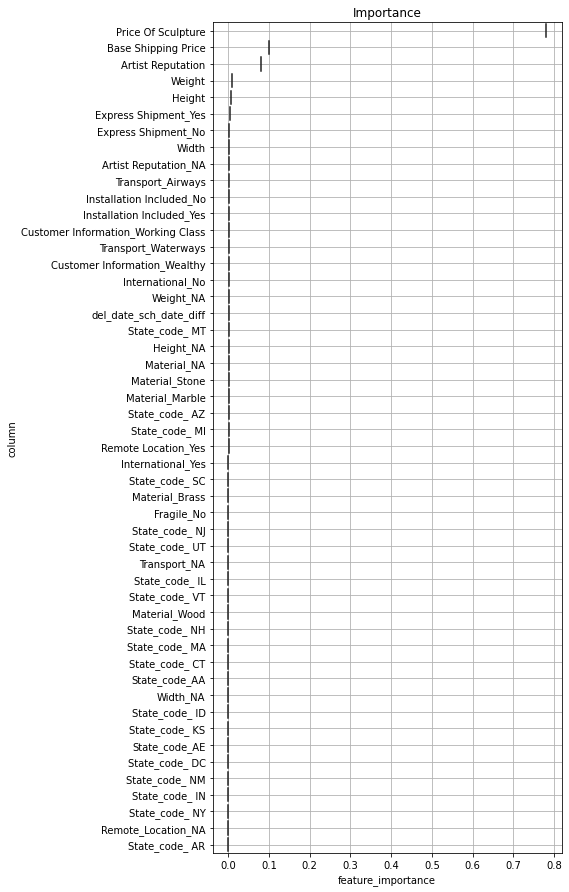

In [85]:
%%time

# Instantiate the model
GBR = GradientBoostingRegressor(**{'n_estimators': 450, 'min_samples_split': 5, 'max_depth': 5, 'learning_rate': 0.2})

# Fit the model to the data
GBR.fit(X_train,Y_train)


# print score of the model
print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_,train_X)



### KNN Regressor

In [86]:
%%time

# Instantiate the model
knnr = KNeighborsRegressor(**{'p': 1, 'n_neighbors': 3, 'leaf_size': 2})

# Fit the model to the data
knnr.fit(X_train,Y_train)


# print score of the model
print_score(knnr)

RMSE-Train: 0.6713390139323844
RMSE-Test: 0.9107228752974152
Score-Train: 0.8377301239519043
Score-Test: 0.6742326180649432
MedAE-Train: 0.30948768883720046
MedAE-Test: 0.4206326804146374
MeanAE-Train: 0.45018642397687814
MeanAE-Test: 0.6139827504708327 

CPU times: user 21.2 s, sys: 400 ms, total: 21.6 s
Wall time: 21.5 s


### Decision Tree Regressor

RMSE-Train: 0.048864831158651395
RMSE-Test: 0.29035965564554644
Score-Train: 0.99914029998018
Score-Test: 0.9668863043725121
MedAE-Train: 0.028920490097949614
MedAE-Test: 0.10444913186123017
MeanAE-Train: 0.03718344782380413
MeanAE-Test: 0.1715449555747185 

CPU times: user 981 ms, sys: 23.4 ms, total: 1 s
Wall time: 1.08 s


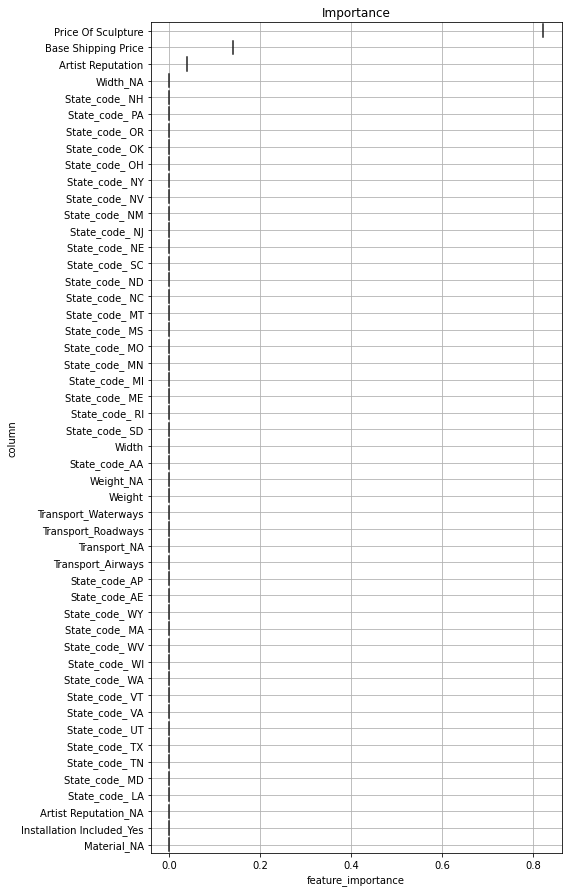

In [87]:
%%time

# Instantiate the model
DTR = DecisionTreeRegressor(**{'splitter': 'best', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 6, 'max_leaf_nodes': 80, 'max_features': 'auto', 'max_depth': 12})

# Fit the model to the data

DTR.fit(X_train,Y_train)

# print score of the model
print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(DTR.feature_importances_,train_X)



### Adaboost Regressor

RMSE-Train: 0.5561705518376703
RMSE-Test: 0.5698408314312717
Score-Train: 0.8886295147547183
Score-Test: 0.8724612262093925
MedAE-Train: 0.3433296776000825
MedAE-Test: 0.3342031367226217
MeanAE-Train: 0.4228454763151883
MeanAE-Test: 0.4244380807724507 

CPU times: user 15.9 s, sys: 193 ms, total: 16.1 s
Wall time: 17.4 s


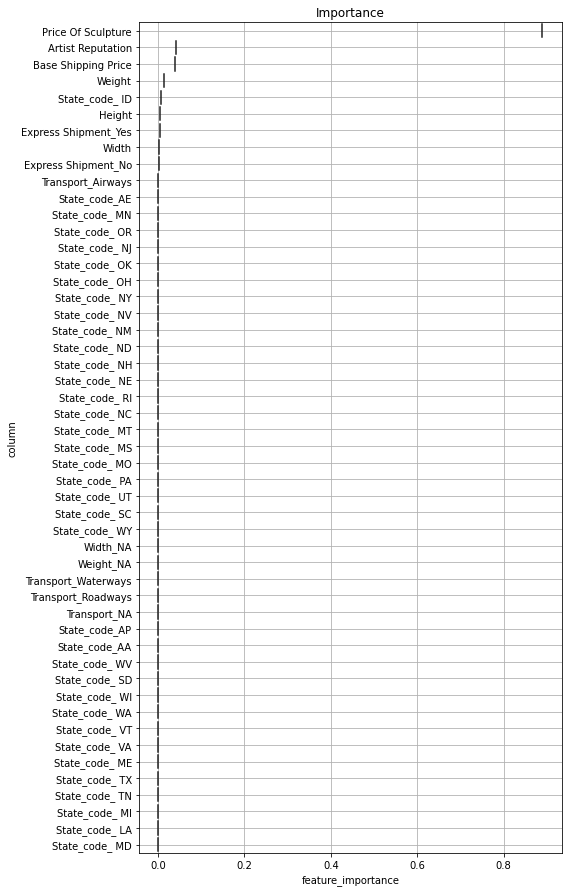

In [88]:
%%time

# Instantiate the model
AdaBoost = AdaBoostRegressor(**{'n_estimators': 500, 'learning_rate': 0.01})

# Fit the model to the data
AdaBoost.fit(X_train,Y_train)

# print score of the model
print_score(AdaBoost)

# visualizing the inportance of features.
fig, ax = visualize_importance(AdaBoost.feature_importances_,train_X)


### XGBoost Regressor

[12:50:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train: 0.16484732355123333
RMSE-Test: 0.29840326329097044
Score-Train: 0.9902159664675287
Score-Test: 0.9650262465924025
MedAE-Train: 0.07758121118004979
MedAE-Test: 0.10124581928790022
MeanAE-Train: 0.11155531427738717
MeanAE-Test: 0.17759009668942946 

CPU times: user 3.73 s, sys: 20.5 ms, total: 3.75 s
Wall time: 3.91 s


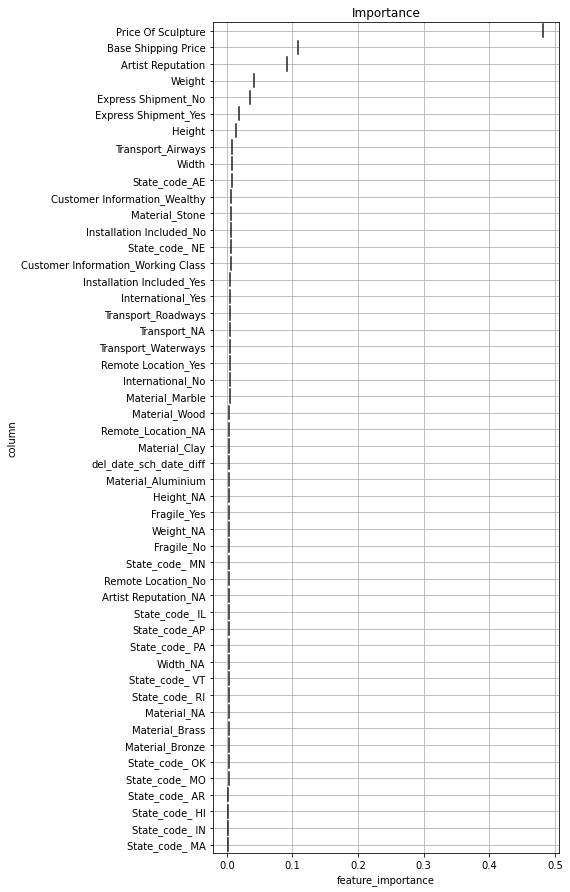

In [90]:
%%time

# Instantiate the model
xgbr = XGBRegressor(**{'min_child_weight': 7, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7})

# Fit the model to the data
xgbr.fit(X_train,Y_train)

# print score of the model
print_score(xgbr)

# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_,train_X)


### Comparing all models

In [91]:
%%time

# create a list of objects of models
models= [DTR, rf, knnr, GBR, xgbr, AdaBoost]
# create a list of names of each model
names = ['Dtree', 'Forest', 'Knn','GBR', 'Xboost', 'AdaBoost']
# passing data for comparison
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)



CPU times: user 42.5 s, sys: 144 ms, total: 42.6 s
Wall time: 44.8 s


In [92]:
# printing comparision of model on train set
print("Results on Train data")
comp_model_train


Results on Train data


,Metric,Dtree,Forest,Knn,GBR,Xboost,AdaBoost
0,rmse,0.926646,0.401428,0.671339,0.048865,0.164847,0.556171
1,MedAE,0.382569,0.214610,0.309488,0.028920,0.077581,0.343330
2,MAE,0.602879,0.290676,0.450186,0.037183,0.111555,0.422845
3,R-squared,0.552489,0.938408,0.780843,0.999137,0.989963,0.868836


In [93]:
# printing comparision of model on test set
print("Results on Test data")

comp_model_test


Results on Test data


,Metric,Dtree,Forest,Knn,GBR,Xboost,AdaBoost
0,rmse,0.915613,0.483204,0.910723,0.290360,0.298403,0.569841
1,MedAE,0.356475,0.226853,0.420633,0.104449,0.101246,0.334203
2,MAE,0.583118,0.326195,0.613983,0.171545,0.177590,0.424438
3,R-squared,0.545528,0.897238,0.551155,0.964773,0.962246,0.843519


### NOTE:

you can use any one of RandomizedSearchCv or GridSearchCV, both works fine.


### Now working with the test dataset provided

In [94]:
# create sample submission datframe with Customer Id column from test data
sample_submission = test_data[['Customer Id']]



In [95]:
# Prepare the test dataset i.e do all the transformation that was done on train dataset by callingthe helper function
test_data = prepare_data(test_data)



In [96]:
# Perform One Hot Encoding on test dataset
test_data = ohe_enc.transform(test_data)

In [97]:
# Check if the shape of the train dataset and test dataset matches
print(train_X.shape)
print(test_data.shape)

(6500, 90)
(3500, 90)


In [100]:
# Perforn the prediction on the test dataset
X_test = test_data

y_predicted = GBR.predict(X_test)

In [101]:
# Create a dataframe with predicted result as data
predicted = pd.DataFrame(data = y_predicted,columns = ['Pred_Cost'])

# print predicted

predicted


,Pred_Cost
0,5.644166
1,5.668370
2,5.284099
3,5.332577
4,5.728250
...,...
3495,7.127615
3496,8.072001
3497,6.262911
3498,5.361484


In [102]:
# Scale the target variable
sample_submission['Cost'] = np.exp(y_predicted)

In [103]:
# Save the dataframe in the CSV format
sample_submission.to_csv('sample_submission.csv',index = False)



### Conclusion

We did training and prediction using all the above models and selected Gradient Boosting Model as final model as it performed well compard to other models with acurracy of 99% on train data and around 96% on test data.

According to this model, the predicted value we got,
matches with the actual target values. Does the model is performing well.

We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.